In [2]:
%matplotlib inline
from fenics import *
import numpy as np

https://github.com/hplgit/fenics-tutorial/tree/master/pub/python/vol1

Task:
A(u)=f

f - prescribed function;
A - operator;
u - trial function;

Variational formulation task:
a(u,v)=L(v)

u - trial function;
v - test function;
U - function space with boundary condition;
V - function space;

FEniCS Classes

Mesh:

UnitSquareMesh(n, m) - n × m rectangles, 
each divided into a pair of triangles;

Spaces:

FunctionSpace(mesh, el_type, order) - 1.mesh, 2.type of element ('P' - lagrange, 'DP' - Galerkin), 3.degree of the finite element;

u = TrialFunction(V) - func for trial with Dirichlet boundary 

v = TestFunction(V) - func for basis with 0 at boundary

u = Function(V) - func for solution

Boundary Conditions:

DirichletBC(V, u_D, boundary) - 1.space, 2.value at boundary, 3.boundary coordinate

u_D = Expression('exp(x[0]*t)>=0 && x[1]>=0 ? pow(x[0], 2) : 2', degree=2) - 1.formula in C++ syntax, 2 - accuracy degree >= space degree, parameter can be updated (u_D.t += dt)

boundary(x) - True if the given point x lies on the Dirichlet boundary and False otherwise

on_boundary - true if on mesh boundary

near(x[0], 1, tol) - abs(x[0] - 1) < tol

u_D = Constant(-6)

Solution:

solve(a == L, u, bc) - 1.equation, 2.trial function, 3. boundary condition

a = dot(grad(u), grad(v))*dx - operator formulation
L = f*v*dx - free member formulation

u.compute_vertex_values(mesh) - calc values of Expression or solution in all vertices
u.vector().array() - calc coefficient vector

Plot:
plot(solution/mesh, title = "")

Errors:
errornorm(real_func, solution, norm_type) - norm_type 'L2' - integral of (real-sol)^2

error_L2  = 0.00823509807335494
error_max = 1.3322676295501878e-15


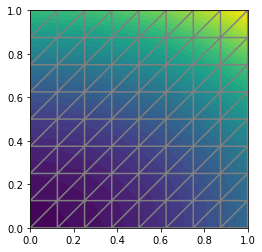

In [11]:
# %load ft01_poisson.py
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary

  u_D = 1 + x^2 + 2y^2
    f = -6
"""

# from __future__ import print_function
# from fenics import *

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)
plot(mesh)

# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
# import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)


In [ ]:
# %load ft02_poisson_membrane.py

<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">



  <link crossorigin="anonymous" media="all" integrity="sha512-y7qmntuinsKc9vzjz7YzWWh8GcPQmvwoF4ULzjX7GgRSvik3SnIR2GIylHwLEF/3nya8RYtrrif1YX5IliJ1wA==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-cbbaa69edba29ec29cf6fce3cfb63359.css" />
    <link crossorigin="anonymous" media="all" integrity="sha512-5495K7TraDdD0rUjH7go28D4vVQZ5ieXuCpiS3jv75MnUggsnjiA3JsOO5nbFy/PpjvO5yYu7KNfr4weDVEkMQ==" rel="stylesheet" href="https://github.githubassets.com/assets/behaviors-e78f792bb4eb683743d2b5231fb828db.css" />
    
    
    
    <link crossorigin="anonymous" media="all" integrity="sha512-sdeTh+U8loxnLuWlh5hUYyRxXIsNrMtJ8ggDYod/VP4vb3vqPN2W+poSiOJQMV6VEoVeHQgxxtT8kg4kIYbTxA==" rel="stylesheet" href="https://github.githubassets.com/assets/github-b1d79387e53c968c672ee5a587985463.css" />

  <script crossorigin="anonymous" defer="defer" integrity="sha512-NefnY8O7CG7NvgTQOUD9T6bwbNxg9zNYTFW1Tkin6RHuUTZvv7S4Vr91TAtVhBYcyfFsUz6ptnpMxRPtAT48tw==" type="application/javascript" src="https://github.githubassets.com/assets/environment-35e7e763.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-YduJ/b0BatW4HfH1xupjk1ZeDCB0tPThg4cKNH+OGXgni9TpP9hiORTWkDU1P5tYrvMdFA0e69ezu3bqIFJlJg==" type="application/javascript" src="https://github.githubassets.com/assets/chunk-frameworks-61db89fd.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-aSQw0mdy3jmIs2xqD05SLlbU+uZWht6JKfuX2PmKc4XWmw3JuyS4bIVBPpbcFD0pFDDc9oOrq6jv0R2UcGtcHg==" type="application/javascript" src="https://github.githubassets.com/assets/chunk-vendor-692430d2.js"></script>
  
  <script crossorigin="anonymous" defer="defer" integrity="sha512-UDfeO939hTyoqjd1n+uEsw4sDn6HJY4Nr5hzOpSq/XpshX5C1GKGrj1jyY1hrOZIZ8khU7s+k3sm+mPHP2ub7g==" type="application/javascript" src="https://github.githubassets.com/assets/behaviors-5037de3b.js"></script>
  
    <script crossorigin="anonymous" defer="defer" integrity="sha512-BUDbrXZbK9QorUrf0KoEbZAJhTnz+BqMm10bqZCK6w5Hwy7YaORQ4F4DXhLkAVTvaJhNhxxeXgmgJLP0TB7TOw==" type="application/javascript" data-module-id="./chunk-advanced.js" data-src="https://github.githubassets.com/assets/chunk-advanced-0540dbad.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-5tWKSr7mhAzSh4Sx5YRFgKftdGxKwHKnOGYw5DlxjHhkQVURYFU3Bk5IMOGMKuAiJTlC3OXYM3xzGcyjzuEFQQ==" type="application/javascript" data-module-id="./chunk-animate-on-scroll.js" data-src="https://github.githubassets.com/assets/chunk-animate-on-scroll-e6d58a4a.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-s0PP+uZXO1CWD0DPPV0P93abrPAYl/FOTIvfmh+CO/XCoP3EdP99yn3FLvNt4LMI7JmWBfGia9JFPZproU8Arw==" type="application/javascript" data-module-id="./chunk-codemirror.js" data-src="https://github.githubassets.com/assets/chunk-codemirror-b343cffa.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-bhezu6Byy77IyhYpoQ0673g8ZoqrBB033b+aJy9z7i24+X7SM/kw44++OQGSRWyzq/kQk68k+nR9HrUcRX8QTg==" type="application/javascript" data-module-id="./chunk-color-modes.js" data-src="https://github.githubassets.com/assets/chunk-color-modes-6e17b3bb.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-DbpM4Xk+KtL8iCOI+ZACZGMdHN+r6aXCD2Wibv0FOD6mvDnGinYFYfj0BcPOrN5Ku2lJuhXylCh2wNDCLPBBeQ==" type="application/javascript" data-module-id="./chunk-confetti.js" data-src="https://github.githubassets.com/assets/chunk-confetti-0dba4ce1.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-P29U0lNmhUj353VrCWp6czdhNpMtF70xVKf4GBGFVKCoqGtxp0sywAM8/46+iC0kdFiRvM13EBvDnq6oyWRwiw==" type="application/javascript" data-module-id="./chunk-contributions-spider-graph.js" data-src="https://github.githubassets.com/assets/chunk-contributions-spider-graph-3f6f54d2.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-vpt2Tdt20tOKRtrRWtOVaRi2wBoAaflNGUR6xuQgU/0Ywfxvbazq0C2hhKwuiC8b6A813gXGm+8fj0NCEosbYQ==" type="application/javascript" data-module-id="./chunk-copy.js" data-src="https://github.githubassets.com/assets/chunk-copy-be9b764d.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-arflMFcVzVAYaP2n7m7gklPChWsVsCDtRPav2Cb6bqLeJf8pgbojWJ3EseKXILCIqfxl/v6arBduZ9SLmpMEZw==" type="application/javascript" data-module-id="./chunk-delayed-loading-element.js" data-src="https://github.githubassets.com/assets/chunk-delayed-loading-element-6ab7e530.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-6j/oSF+kbW+yetNPvI684VzAu9pzug6Vj2h+3u1LdCuRhR4jnuiHZfeQKls3nxcT/S3H+oIt7FtigE/aeoj+gg==" type="application/javascript" data-module-id="./chunk-drag-drop.js" data-src="https://github.githubassets.com/assets/chunk-drag-drop-ea3fe848.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-VSSd+Yzi2iMS+pibY6hD/WdypxAEdob5F2RMKxuKcAHS2EpFYJPeTXoVxt0NXg03tfj2dka2mEtHS+vjpYSaDw==" type="application/javascript" data-module-id="./chunk-edit-hook-secret-element.js" data-src="https://github.githubassets.com/assets/chunk-edit-hook-secret-element-55249df9.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-ErqZFlIt7zIbLoZHvwfq9Zjo5zo+Y1A410nePDGvK+WVTVP10iNTfoqdOOSZNSy1gtLKIWDIIiOV30lr6zUJCA==" type="application/javascript" data-module-id="./chunk-edit.js" data-src="https://github.githubassets.com/assets/chunk-edit-12ba9916.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-aiqMIGGZGo8AQMjcoImKPMTsZVVRl6htCSY7BpRmpGPG/AF+Wq+P/Oj/dthWQOIk9cCNMPEas7O2zAR6oqn0tA==" type="application/javascript" data-module-id="./chunk-emoji-picker-element.js" data-src="https://github.githubassets.com/assets/chunk-emoji-picker-element-6a2a8c20.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-qQqGl9V1OlhqcrXFRF4bxtQv57rfhbmPAO9uLAXvYAJSYQ3iv8EbgGTr2qwQKlW3mS4Y/G0Wb33nqIBPGnI4UQ==" type="application/javascript" data-module-id="./chunk-failbot.js" data-src="https://github.githubassets.com/assets/chunk-failbot-a90a8697.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-sy0KBzl3Hruew+orJ1/E4cyuUixtV0uS03SSHpYRzhAepWejugyPs3AwHpQ+Em5HaMfd1MPz/M4+xEaFbQc5gA==" type="application/javascript" data-module-id="./chunk-feature-callout-element.js" data-src="https://github.githubassets.com/assets/chunk-feature-callout-element-b32d0a07.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-h8LRqLfdvdK2/kSKj8JYy6jyBdlTywxL4lqwV6OVOd3SCPRgUJ4/r3KHFQZPuYw0G7AWWhJY/IoitYLvAWFe5Q==" type="application/javascript" data-module-id="./chunk-filter-input.js" data-src="https://github.githubassets.com/assets/chunk-filter-input-87c2d1a8.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-iBkxrL4rf4KnKeO9maVxvhkF9TdwPKUD01qS2Iz/hSk/jL29w/tbNrB/GF15pWhDttaZddz86A/ahZrkBJ7TDA==" type="application/javascript" data-module-id="./chunk-get-repo-element.js" data-src="https://github.githubassets.com/assets/chunk-get-repo-element-881931ac.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-BF1fZchtuQCE1TopmDRScOJvPcKHM7jBfIyLaszKOhcEJBF6fdCakk0mizbO15yCMiXk+4VIDTMzgGm96O/JCQ==" type="application/javascript" data-module-id="./chunk-insights-query.js" data-src="https://github.githubassets.com/assets/chunk-insights-query-045d5f65.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-4Wq8F/+bu5aXHG0CFx4Z1Whiip3tIAR70gvZgZtx8HiTLyBdzEUSSA9Soe3c67SUGuiJQB834x/1sse1bxBmeg==" type="application/javascript" data-module-id="./chunk-invitations.js" data-src="https://github.githubassets.com/assets/chunk-invitations-e16abc17.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-MK8AF7rTIp9b/Y22bIF+ZPERMAOVc1CdGglONny7pyJgFC13KfM+gPFqiWNGZoJW52Mqn6ytFFRjRwGc5hslwA==" type="application/javascript" data-module-id="./chunk-jump-to.js" data-src="https://github.githubassets.com/assets/chunk-jump-to-30af0017.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-VtdawM/OSsu+d6v25ZY6UcQa/GGLAStSESjsqdEwx+ey88GNYGkQ24o+JFFo4lY+7wLMRf7aCrLxkA5SquBoNQ==" type="application/javascript" data-module-id="./chunk-launch-code-element.js" data-src="https://github.githubassets.com/assets/chunk-launch-code-element-56d75ac0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-RR5Uk+KE9M/CsqLcmgReChS7ZDjm8gxcOnDYWWkMdeTsrpW/xDlJHQEgUfuEC6HJXfyPNcW+oBTHqMnucNYGTQ==" type="application/javascript" data-module-id="./chunk-line-chart.js" data-src="https://github.githubassets.com/assets/chunk-line-chart-451e5493.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-pVsfAdQhmik/DpzZsqT2oPKh6IODu9RkYcwTufm+8I0VT7z2RVtjjGr+UNzq1AWMHTrQSU81D8y6OTdTfz0pPA==" type="application/javascript" data-module-id="./chunk-metric-selection-element.js" data-src="https://github.githubassets.com/assets/chunk-metric-selection-element-a55b1f01.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-7hZ031ngiF36wGsfcoyyCWTqwYxjX+qeTLtCV7CJ+IO+wzkzCm1RoR3WzWczfWmwLNqr+Hu3kQOgkBaGn4ntWQ==" type="application/javascript" data-module-id="./chunk-notification-list-focus.js" data-src="https://github.githubassets.com/assets/chunk-notification-list-focus-ee1674df.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-jWh1YTQkIL8hsV/B5tC06aa7nleSGH1p86ini3T5nyuMXdt8aaK2mzqi7O7S0Q6yxiS0mfcDAJh/2i+Jkh8Ycw==" type="application/javascript" data-module-id="./chunk-premium-runners.js" data-src="https://github.githubassets.com/assets/chunk-premium-runners-8d687561.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-wXlv/QM4OsXYyUuSfFjx3XqSmvfLqtjvBx6wFlGNmHzd6Dkmr1HkTZs1qpCYTCjiyw1zm5ORa4O4gWAKc+cKPw==" type="application/javascript" data-module-id="./chunk-presence-avatars.js" data-src="https://github.githubassets.com/assets/chunk-presence-avatars-c1796ffd.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-ma0OOy3nj0c1cqBx0BkcmIFsLqcSZ+MIukQxyEFM/OWTzZpG+QMgOoWPAHZz43M6fyjAUG1jH6c/6LPiiKPCyw==" type="application/javascript" data-module-id="./chunk-profile-pins-element.js" data-src="https://github.githubassets.com/assets/chunk-profile-pins-element-99ad0e3b.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-hgoSKLTlL8I3IWr/TLONCU+N4kdCtdrHCrrud4NKhgRlLrTw0XUPhqBaDdZUiFSzDQRw/nFQ1kw2VeTm0g9+lA==" type="application/javascript" data-module-id="./chunk-profile.js" data-src="https://github.githubassets.com/assets/chunk-profile-860a1228.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-TsdhRjR31S8dafQeOyaX5eWWpWBAreJ34B4Kc8mzZH0XPjO+KdgW5C2lXuMMkoSpQQ0d6Bme0TGokkFiBDOuoA==" type="application/javascript" data-module-id="./chunk-pulse-authors-graph-element.js" data-src="https://github.githubassets.com/assets/chunk-pulse-authors-graph-element-4ec76146.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-NCzTRSTvxCiuc0xreg1z12Brlt3fS9+WtnYGUcdEDDpXbj/0irVch6Tr6RjBx0fMDeaJjw3kUfEsnSHQSQoXzg==" type="application/javascript" data-module-id="./chunk-readme-toc-element.js" data-src="https://github.githubassets.com/assets/chunk-readme-toc-element-342cd345.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-DzzdRhToySuRxHkYlTIW4fLX3/yY6VlVkg+er2yKynUSbiLqTRji+tl29UFifcFSVbkWNtqU+PzJ5bQA4VagMg==" type="application/javascript" data-module-id="./chunk-ref-selector.js" data-src="https://github.githubassets.com/assets/chunk-ref-selector-0f3cdd46.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-fY3YY8F6TWWH1WYn5usF5UW8HOzBtYjc4UntE5AiF9EBIIEF8dJ7emzsbOtvO8lvPC5jrN7KY9C0NjOAFkVaAw==" type="application/javascript" data-module-id="./chunk-remote-clipboard-copy.js" data-src="https://github.githubassets.com/assets/chunk-remote-clipboard-copy-7d8dd863.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-I7iI902D1A6s8umCD2hbF4o0hKW1lrpNfRJ2H7uw6fdMVR/8Jdtn19b3G/DDIT4lpXOUToZXTmbYnFQAYc5gag==" type="application/javascript" data-module-id="./chunk-responsive-underlinenav.js" data-src="https://github.githubassets.com/assets/chunk-responsive-underlinenav-23b888f7.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-SWy36S28Js+/YzsvYgmp+IEdC0qtMcBf6sYhXTEcj1aFPCLPOTOnOKqzFiNyH2oNVDd+u5Qi8eqYINSIu28LFQ==" type="application/javascript" data-module-id="./chunk-runner-groups.js" data-src="https://github.githubassets.com/assets/chunk-runner-groups-496cb7e9.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-SVdK0K69PnQ4FChdpl650OR+vplYWXqddxNkEGKhQf6tkehqvKkFEg5LQSZgCVKt2tfc9CnWJlmKCwbTTipEjg==" type="application/javascript" data-module-id="./chunk-series-table.js" data-src="https://github.githubassets.com/assets/chunk-series-table-49574ad0.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-9AqTNQE0sCN9/up20zvfdcNtJ6FYVuqGPT6jpfV8Rv5SRaSXr7HxrGC0XEXcZ0avlCfuYJN0BjXK7ZT90YV0Jg==" type="application/javascript" data-module-id="./chunk-severity-calculator-element.js" data-src="https://github.githubassets.com/assets/chunk-severity-calculator-element-f40a9335.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-hfTeziNEhi1rIq34BcOSKc1fr0uEqUhKbVKhJ/Fb4vMvUd4hguPT8aNTcKGvb0mrwmsvB7pVVemJN8RIRcohVw==" type="application/javascript" data-module-id="./chunk-sortable-behavior.js" data-src="https://github.githubassets.com/assets/chunk-sortable-behavior-85f4dece.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-teifrH+l5oInsnj9unIzTlLXwGBzUXjA1rsCZVlUJIJtV2buzZ4ztSz3aR6hGF8dbtMPzzxeetRb4hdumLfZ+A==" type="application/javascript" data-module-id="./chunk-stacked-area-chart.js" data-src="https://github.githubassets.com/assets/chunk-stacked-area-chart-b5e89fac.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-0un7YfS4DMB7Z9mRB0xkLLjNFXlMWWndjz/zwZVJULaqWBvL/1zYWPLmEnO4Oo25KZnG3fcBXx/D7RA9lJzvDQ==" type="application/javascript" data-module-id="./chunk-stacks-input-config-view.js" data-src="https://github.githubassets.com/assets/chunk-stacks-input-config-view-d2e9fb61.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-JpNJG8pxUUH23zmjjPoEX+vdJEbirSn0LZKboZQtkQetg6YF3gBSVKiDC2XbtcBa17QKk1ZMq0/G7bHjE2fcug==" type="application/javascript" data-module-id="./chunk-stacks-progress-view.js" data-src="https://github.githubassets.com/assets/chunk-stacks-progress-view-2693491b.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-nKa3UdA2O7Ve4Jn24gaB20yUfJvS7wlnd8Q8C+iWD8i2tXLgaKemDWkLeexeQdrs+an98FCl5fOiy0J+izn+tQ==" type="application/javascript" data-module-id="./chunk-three.module.js" data-src="https://github.githubassets.com/assets/chunk-three.module-9ca6b751.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-8qtTOlViBmJpulpJ3C/+7Ab33S7MP5tAEIfHZL7J4m+3igtVGAE4r7ygy1rBRj/ccG8Iu1pCKIKvAfGYVzSplQ==" type="application/javascript" data-module-id="./chunk-tip.js" data-src="https://github.githubassets.com/assets/chunk-tip-f2ab533a.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-WK8VXw3lfUQ/VRW0zlgKPhcMUqH0uTnB/KzePUPdZhCm/HpxfXXHKTGvj5C0Oex7+zbIM2ECzULbtTCT4ug3yg==" type="application/javascript" data-module-id="./chunk-toast.js" data-src="https://github.githubassets.com/assets/chunk-toast-58af155f.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-MSRS8SYgnFvQSIKjPq83ts4zQqtS7YOZXK7D4Xf0SeXB4HPtzes0YeDAFQeCkpxu8p+CcO2Uty4rAyPaYzQCEg==" type="application/javascript" data-module-id="./chunk-tweetsodium.js" data-src="https://github.githubassets.com/assets/chunk-tweetsodium-312452f1.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-ofRdgfpJWKXCqSaQAzRBcoN84WOY1Aylp4WfAaPsK0+sNC3Ra88YBRTniQ/zrqQk3K3BB1/ujPpwg/dxi55AKA==" type="application/javascript" data-module-id="./chunk-typography-toggle.js" data-src="https://github.githubassets.com/assets/chunk-typography-toggle-a1f45d81.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-fvcOOYapCxPkDRQWz2WQzrqL6rRhX88yHWF87fb9Xny2Fq4lri0ONaVFL7XDSTiTyu4OTp+8WoyfMVpgGUaaVg==" type="application/javascript" data-module-id="./chunk-unveil.js" data-src="https://github.githubassets.com/assets/chunk-unveil-7ef70e39.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-tfDovufjqpDMPXmqUsuaaNNOO/dXi8aRCTQSuCJuT42YBx+Wukve4l+a60Bh7w9YnM8UzUFrAPL/Y++jjMADtQ==" type="application/javascript" data-module-id="./chunk-user-status-submit.js" data-src="https://github.githubassets.com/assets/chunk-user-status-submit-b5f0e8be.js"></script>
    <script crossorigin="anonymous" defer="defer" integrity="sha512-cKu/+X7gT+WVH4sXKt0g3G77bfQfcgwurRObM+dt8XylPm9eEWI+/aWKhVab6VsYuvvuI5BTriKXhXfJwaSXdQ==" type="application/javascript" data-module-id="./chunk-webgl-warp.js" data-src="https://github.githubassets.com/assets/chunk-webgl-warp-70abbff9.js"></script>
  
  <script crossorigin="anonymous" defer="defer" integrity="sha512-s8XOWOGuU50Tbaby6bwqICQifBdDFY7e3NKAHjL68vaWsVqNq/ngvsPVCU3qVV35L/C520NAJLGV7b9QLb9eCg==" type="application/javascript" src="https://github.githubassets.com/assets/repositories-b3c5ce58.js"></script>
<script crossorigin="anonymous" defer="defer" integrity="sha512-oF92wh/Y8n9s2C9NSGlUII7pD3iUpkZO0+o+U3g1LM4/jhvn/vVLbFIPSok8XFuJq9R7Rrk54W5yWmBx/4H45w==" type="application/javascript" src="https://github.githubassets.com/assets/diffs-a05f76c2.js"></script>

  <meta name="viewport" content="width=device-width">
  
  <title>fenics-tutorial/ft02_poisson_membrane.py at master · hplgit/fenics-tutorial</title>
    <meta name="description" content="Source files and published documents for the FEniCS tutorial. - fenics-tutorial/ft02_poisson_membrane.py at master · hplgit/fenics-tutorial">
    <link rel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="GitHub">
  <link rel="fluid-icon" href="https://github.com/fluidicon.png" title="GitHub">
  <meta property="fb:app_id" content="1401488693436528">
  <meta name="apple-itunes-app" content="app-id=1477376905" />
    <meta name="twitter:image:src" content="https://opengraph.githubassets.com/e56fb621aa2e7d56976ecd9fcbfd31c566a042706ff0d107f84e797f368b4a8e/hplgit/fenics-tutorial" /><meta name="twitter:site" content="@github" /><meta name="twitter:card" content="summary_large_image" /><meta name="twitter:title" content="fenics-tutorial/ft02_poisson_membrane.py at master · hplgit/fenics-tutorial" /><meta name="twitter:description" content="Source files and published documents for the FEniCS tutorial. - fenics-tutorial/ft02_poisson_membrane.py at master · hplgit/fenics-tutorial" />
    <meta property="og:image" content="https://opengraph.githubassets.com/e56fb621aa2e7d56976ecd9fcbfd31c566a042706ff0d107f84e797f368b4a8e/hplgit/fenics-tutorial" /><meta property="og:image:alt" content="Source files and published documents for the FEniCS tutorial. - fenics-tutorial/ft02_poisson_membrane.py at master · hplgit/fenics-tutorial" /><meta property="og:image:width" content="1200" /><meta property="og:image:height" content="600" /><meta property="og:site_name" content="GitHub" /><meta property="og:type" content="object" /><meta property="og:title" content="fenics-tutorial/ft02_poisson_membrane.py at master · hplgit/fenics-tutorial" /><meta property="og:url" content="https://github.com/hplgit/fenics-tutorial" /><meta property="og:description" content="Source files and published documents for the FEniCS tutorial. - fenics-tutorial/ft02_poisson_membrane.py at master · hplgit/fenics-tutorial" />



    

  <link rel="assets" href="https://github.githubassets.com/">
    <link rel="shared-web-socket" href="wss://alive.github.com/_sockets/u/67433712/ws?session=eyJ2IjoiVjMiLCJ1Ijo2NzQzMzcxMiwicyI6NzUyNjQ4Njk1LCJjIjoyNzI1NDY1NDg2LCJ0IjoxNjMyMTQ4NTM5fQ==--1600f5f45ffc9524c5e00cf2b1d8635123c6a7980ae1a4433e68d646597e18c0" data-refresh-url="/_alive" data-session-id="0b522a5a501a472f170d591dad8fcfc7f6286688a90651db8c0f9a10a8d38225">
    <link rel="shared-web-socket-src" href="/socket-worker-0af8a29d.js">
  <link rel="sudo-modal" href="/sessions/sudo_modal">

  <meta name="request-id" content="451C:915C:1415FBD:15D92D7:61489C28" data-pjax-transient="true" /><meta name="html-safe-nonce" content="ad9acb19d356930e18a70234a250dde5d51cd0d28367f571c6e013a96e90284c" data-pjax-transient="true" /><meta name="visitor-payload" content="eyJyZWZlcnJlciI6Imh0dHBzOi8vZ2l0aHViLmNvbS9ocGxnaXQvZmVuaWNzLXR1dG9yaWFsL3RyZWUvbWFzdGVyL3B1Yi9weXRob24vdm9sMSIsInJlcXVlc3RfaWQiOiI0NTFDOjkxNUM6MTQxNUZCRDoxNUQ5MkQ3OjYxNDg5QzI4IiwidmlzaXRvcl9pZCI6Ijk3NDQwMDY0MDgxOTg0NTEwMiIsInJlZ2lvbl9lZGdlIjoiZnJhIiwicmVnaW9uX3JlbmRlciI6ImlhZCJ9" data-pjax-transient="true" /><meta name="visitor-hmac" content="d56e7dd4281363c34b177e34cd00a4ef4bafd7be27cba441b28e8a66e00eb83c" data-pjax-transient="true" />

    <meta name="hovercard-subject-tag" content="repository:31650844" data-pjax-transient>


  <meta name="github-keyboard-shortcuts" content="repository,source-code" data-pjax-transient="true" />

  

  <meta name="selected-link" value="repo_source" data-pjax-transient>

    <meta name="google-site-verification" content="c1kuD-K2HIVF635lypcsWPoD4kilo5-jA_wBFyT4uMY">
  <meta name="google-site-verification" content="KT5gs8h0wvaagLKAVWq8bbeNwnZZK1r1XQysX3xurLU">
  <meta name="google-site-verification" content="ZzhVyEFwb7w3e0-uOTltm8Jsck2F5StVihD0exw2fsA">
  <meta name="google-site-verification" content="GXs5KoUUkNCoaAZn7wPN-t01Pywp9M3sEjnt_3_ZWPc">

<meta name="octolytics-host" content="collector.githubapp.com" /><meta name="octolytics-app-id" content="github" /><meta name="octolytics-event-url" content="https://collector.githubapp.com/github-external/browser_event" /><meta name="octolytics-url" content="https://collector.githubapp.com/github/collect" /><meta name="octolytics-actor-id" content="67433712" /><meta name="octolytics-actor-login" content="NikomSol" /><meta name="octolytics-actor-hash" content="d86c32b81aabebb919b2c8edabcb1479af1a680ea8085deb084156d161e9e08c" />

  <meta name="analytics-location" content="/&lt;user-name&gt;/&lt;repo-name&gt;/blob/show" data-pjax-transient="true" />

  



  <meta name="optimizely-datafile" content="{&quot;version&quot;: &quot;4&quot;, &quot;rollouts&quot;: [], &quot;typedAudiences&quot;: [], &quot;anonymizeIP&quot;: true, &quot;projectId&quot;: &quot;16737760170&quot;, &quot;variables&quot;: [], &quot;featureFlags&quot;: [], &quot;experiments&quot;: [{&quot;status&quot;: &quot;Running&quot;, &quot;audienceIds&quot;: [], &quot;variations&quot;: [{&quot;variables&quot;: [], &quot;id&quot;: &quot;20438636352&quot;, &quot;key&quot;: &quot;control&quot;}, {&quot;variables&quot;: [], &quot;id&quot;: &quot;20484957397&quot;, &quot;key&quot;: &quot;treatment&quot;}], &quot;id&quot;: &quot;20479227424&quot;, &quot;key&quot;: &quot;growth_ghec_onboarding_experience&quot;, &quot;layerId&quot;: &quot;20467848595&quot;, &quot;trafficAllocation&quot;: [{&quot;entityId&quot;: &quot;20484957397&quot;, &quot;endOfRange&quot;: 1000}, {&quot;entityId&quot;: &quot;20438636352&quot;, &quot;endOfRange&quot;: 5000}, {&quot;entityId&quot;: &quot;20438636352&quot;, &quot;endOfRange&quot;: 6000}, {&quot;entityId&quot;: &quot;20484957397&quot;, &quot;endOfRange&quot;: 8000}, {&quot;entityId&quot;: &quot;20484957397&quot;, &quot;endOfRange&quot;: 10000}], &quot;forcedVariations&quot;: {}}, {&quot;status&quot;: &quot;Running&quot;, &quot;audienceIds&quot;: [], &quot;variations&quot;: [{&quot;variables&quot;: [], &quot;id&quot;: &quot;20508232513&quot;, &quot;key&quot;: &quot;control&quot;}, {&quot;variables&quot;: [], &quot;id&quot;: &quot;20533742085&quot;, &quot;key&quot;: &quot;treatment&quot;}], &quot;id&quot;: &quot;20512531891&quot;, &quot;key&quot;: &quot;growth_pull_request_actions_prompt&quot;, &quot;layerId&quot;: &quot;20529822202&quot;, &quot;trafficAllocation&quot;: [{&quot;entityId&quot;: &quot;20533742085&quot;, &quot;endOfRange&quot;: 5000}, {&quot;entityId&quot;: &quot;20508232513&quot;, &quot;endOfRange&quot;: 10000}], &quot;forcedVariations&quot;: {}}, {&quot;status&quot;: &quot;Running&quot;, &quot;audienceIds&quot;: [], &quot;variations&quot;: [{&quot;variables&quot;: [], &quot;id&quot;: &quot;20543572345&quot;, &quot;key&quot;: &quot;control&quot;}, {&quot;variables&quot;: [], &quot;id&quot;: &quot;20510876757&quot;, &quot;key&quot;: &quot;treatment&quot;}], &quot;id&quot;: &quot;20518037255&quot;, &quot;key&quot;: &quot;growth_issue_actions_prompt&quot;, &quot;layerId&quot;: &quot;20522524291&quot;, &quot;trafficAllocation&quot;: [{&quot;entityId&quot;: &quot;20510876757&quot;, &quot;endOfRange&quot;: 5000}, {&quot;entityId&quot;: &quot;20543572345&quot;, &quot;endOfRange&quot;: 10000}], &quot;forcedVariations&quot;: {}}, {&quot;status&quot;: &quot;Running&quot;, &quot;audienceIds&quot;: [], &quot;variations&quot;: [{&quot;variables&quot;: [], &quot;id&quot;: &quot;20619540113&quot;, &quot;key&quot;: &quot;control&quot;}, {&quot;variables&quot;: [], &quot;id&quot;: &quot;20598530123&quot;, &quot;key&quot;: &quot;treatment&quot;}], &quot;id&quot;: &quot;20619150105&quot;, &quot;key&quot;: &quot;dynamic_seats&quot;, &quot;layerId&quot;: &quot;20615170077&quot;, &quot;trafficAllocation&quot;: [{&quot;entityId&quot;: &quot;20598530123&quot;, &quot;endOfRange&quot;: 5000}, {&quot;entityId&quot;: &quot;20619540113&quot;, &quot;endOfRange&quot;: 10000}], &quot;forcedVariations&quot;: {}}], &quot;audiences&quot;: [{&quot;conditions&quot;: &quot;[\&quot;or\&quot;, {\&quot;match\&quot;: \&quot;exact\&quot;, \&quot;name\&quot;: \&quot;$opt_dummy_attribute\&quot;, \&quot;type\&quot;: \&quot;custom_attribute\&quot;, \&quot;value\&quot;: \&quot;$opt_dummy_value\&quot;}]&quot;, &quot;id&quot;: &quot;$opt_dummy_audience&quot;, &quot;name&quot;: &quot;Optimizely-Generated Audience for Backwards Compatibility&quot;}], &quot;groups&quot;: [], &quot;sdkKey&quot;: &quot;WTc6awnGuYDdG98CYRban&quot;, &quot;environmentKey&quot;: &quot;production&quot;, &quot;attributes&quot;: [{&quot;id&quot;: &quot;16822470375&quot;, &quot;key&quot;: &quot;user_id&quot;}, {&quot;id&quot;: &quot;17143601254&quot;, &quot;key&quot;: &quot;spammy&quot;}, {&quot;id&quot;: &quot;18175660309&quot;, &quot;key&quot;: &quot;organization_plan&quot;}, {&quot;id&quot;: &quot;18813001570&quot;, &quot;key&quot;: &quot;is_logged_in&quot;}, {&quot;id&quot;: &quot;19073851829&quot;, &quot;key&quot;: &quot;geo&quot;}, {&quot;id&quot;: &quot;20175462351&quot;, &quot;key&quot;: &quot;requestedCurrency&quot;}], &quot;botFiltering&quot;: false, &quot;accountId&quot;: &quot;16737760170&quot;, &quot;events&quot;: [{&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;17911811441&quot;, &quot;key&quot;: &quot;hydro_click.dashboard.teacher_toolbox_cta&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18124116703&quot;, &quot;key&quot;: &quot;submit.organizations.complete_sign_up&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18145892387&quot;, &quot;key&quot;: &quot;no_metric.tracked_outside_of_optimizely&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18178755568&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.add_repo&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18180553241&quot;, &quot;key&quot;: &quot;submit.repository_imports.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18186103728&quot;, &quot;key&quot;: &quot;click.help.learn_more_about_repository_creation&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18188530140&quot;, &quot;key&quot;: &quot;test_event.do_not_use_in_production&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18191963644&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.transfer_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18195612788&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.import_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18210945499&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.invite_members&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18211063248&quot;, &quot;key&quot;: &quot;click.empty_org_repo_cta.create_repository&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18215721889&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.update_profile&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18224360785&quot;, &quot;key&quot;: &quot;click.org_onboarding_checklist.dismiss&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18234832286&quot;, &quot;key&quot;: &quot;submit.organization_activation.complete&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18252392383&quot;, &quot;key&quot;: &quot;submit.org_repository.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18257551537&quot;, &quot;key&quot;: &quot;submit.org_member_invitation.create&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18259522260&quot;, &quot;key&quot;: &quot;submit.organization_profile.update&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18564603625&quot;, &quot;key&quot;: &quot;view.classroom_select_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18568612016&quot;, &quot;key&quot;: &quot;click.classroom_sign_in_click&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18572592540&quot;, &quot;key&quot;: &quot;view.classroom_name&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18574203855&quot;, &quot;key&quot;: &quot;click.classroom_create_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18582053415&quot;, &quot;key&quot;: &quot;click.classroom_select_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18589463420&quot;, &quot;key&quot;: &quot;click.classroom_create_classroom&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18591323364&quot;, &quot;key&quot;: &quot;click.classroom_create_first_classroom&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18591652321&quot;, &quot;key&quot;: &quot;click.classroom_grant_access&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;18607131425&quot;, &quot;key&quot;: &quot;view.classroom_creation&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;, &quot;20619150105&quot;], &quot;id&quot;: &quot;18831680583&quot;, &quot;key&quot;: &quot;upgrade_account_plan&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19064064515&quot;, &quot;key&quot;: &quot;click.signup&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19075373687&quot;, &quot;key&quot;: &quot;click.view_account_billing_page&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19077355841&quot;, &quot;key&quot;: &quot;click.dismiss_signup_prompt&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19079713938&quot;, &quot;key&quot;: &quot;click.contact_sales&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19120963070&quot;, &quot;key&quot;: &quot;click.compare_account_plans&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19151690317&quot;, &quot;key&quot;: &quot;click.upgrade_account_cta&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19424193129&quot;, &quot;key&quot;: &quot;click.open_account_switcher&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19520330825&quot;, &quot;key&quot;: &quot;click.visit_account_profile&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19540970635&quot;, &quot;key&quot;: &quot;click.switch_account_context&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19730198868&quot;, &quot;key&quot;: &quot;submit.homepage_signup&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19820830627&quot;, &quot;key&quot;: &quot;click.homepage_signup&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;19988571001&quot;, &quot;key&quot;: &quot;click.create_enterprise_trial&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20036538294&quot;, &quot;key&quot;: &quot;click.create_organization_team&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20040653299&quot;, &quot;key&quot;: &quot;click.input_enterprise_trial_form&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20062030003&quot;, &quot;key&quot;: &quot;click.continue_with_team&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20068947153&quot;, &quot;key&quot;: &quot;click.create_organization_free&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20086636658&quot;, &quot;key&quot;: &quot;click.signup_continue.username&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20091648988&quot;, &quot;key&quot;: &quot;click.signup_continue.create_account&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20103637615&quot;, &quot;key&quot;: &quot;click.signup_continue.email&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20111574253&quot;, &quot;key&quot;: &quot;click.signup_continue.password&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20120044111&quot;, &quot;key&quot;: &quot;view.pricing_page&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20152062109&quot;, &quot;key&quot;: &quot;submit.create_account&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20165800992&quot;, &quot;key&quot;: &quot;submit.upgrade_payment_form&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20171520319&quot;, &quot;key&quot;: &quot;submit.create_organization&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20222645674&quot;, &quot;key&quot;: &quot;click.recommended_plan_in_signup.discuss_your_needs&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20227443657&quot;, &quot;key&quot;: &quot;submit.verify_primary_user_email&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20234607160&quot;, &quot;key&quot;: &quot;click.recommended_plan_in_signup.try_enterprise&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20238175784&quot;, &quot;key&quot;: &quot;click.recommended_plan_in_signup.team&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20239847212&quot;, &quot;key&quot;: &quot;click.recommended_plan_in_signup.continue_free&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20251097193&quot;, &quot;key&quot;: &quot;recommended_plan&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20438619534&quot;, &quot;key&quot;: &quot;click.pricing_calculator.1_member&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20456699683&quot;, &quot;key&quot;: &quot;click.pricing_calculator.15_members&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20467868331&quot;, &quot;key&quot;: &quot;click.pricing_calculator.10_members&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20476267432&quot;, &quot;key&quot;: &quot;click.trial_days_remaining&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20476357660&quot;, &quot;key&quot;: &quot;click.discover_feature&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20479287901&quot;, &quot;key&quot;: &quot;click.pricing_calculator.custom_members&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20481107083&quot;, &quot;key&quot;: &quot;click.recommended_plan_in_signup.apply_teacher_benefits&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20483089392&quot;, &quot;key&quot;: &quot;click.pricing_calculator.5_members&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20484283944&quot;, &quot;key&quot;: &quot;click.onboarding_task&quot;}, {&quot;experimentIds&quot;: [], &quot;id&quot;: &quot;20484996281&quot;, &quot;key&quot;: &quot;click.recommended_plan_in_signup.apply_student_benefits&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20486713726&quot;, &quot;key&quot;: &quot;click.onboarding_task_breadcrumb&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20490791319&quot;, &quot;key&quot;: &quot;click.upgrade_to_enterprise&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20491786766&quot;, &quot;key&quot;: &quot;click.talk_to_us&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20494144087&quot;, &quot;key&quot;: &quot;click.dismiss_enterprise_trial&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20499722759&quot;, &quot;key&quot;: &quot;completed_all_tasks&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20500710104&quot;, &quot;key&quot;: &quot;completed_onboarding_tasks&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20513160672&quot;, &quot;key&quot;: &quot;click.read_doc&quot;}, {&quot;experimentIds&quot;: [&quot;20512531891&quot;], &quot;id&quot;: &quot;20516196762&quot;, &quot;key&quot;: &quot;actions_enabled&quot;}, {&quot;experimentIds&quot;: [&quot;20479227424&quot;], &quot;id&quot;: &quot;20518980986&quot;, &quot;key&quot;: &quot;click.dismiss_trial_banner&quot;}, {&quot;experimentIds&quot;: [&quot;20518037255&quot;], &quot;id&quot;: &quot;20535446721&quot;, &quot;key&quot;: &quot;click.issue_actions_prompt.dismiss_prompt&quot;}, {&quot;experimentIds&quot;: [&quot;20518037255&quot;], &quot;id&quot;: &quot;20557002247&quot;, &quot;key&quot;: &quot;click.issue_actions_prompt.setup_workflow&quot;}, {&quot;experimentIds&quot;: [&quot;20512531891&quot;], &quot;id&quot;: &quot;20595070227&quot;, &quot;key&quot;: &quot;click.pull_request_setup_workflow&quot;}, {&quot;experimentIds&quot;: [&quot;20619150105&quot;], &quot;id&quot;: &quot;20626600314&quot;, &quot;key&quot;: &quot;click.seats_input&quot;}, {&quot;experimentIds&quot;: [&quot;20619150105&quot;], &quot;id&quot;: &quot;20642310305&quot;, &quot;key&quot;: &quot;click.decrease_seats_number&quot;}, {&quot;experimentIds&quot;: [&quot;20619150105&quot;], &quot;id&quot;: &quot;20662990045&quot;, &quot;key&quot;: &quot;click.increase_seats_number&quot;}], &quot;revision&quot;: &quot;894&quot;}" />
  <!-- To prevent page flashing, the optimizely JS needs to be loaded in the
    <head> tag before the DOM renders -->
  <script crossorigin="anonymous" defer="defer" integrity="sha512-7a4rVbo+/LFUpL2MhsjGYzUkVodWk13qsaHYAnFjzOlNoKGTJsOoHeotE/cQxbXBaDwsWXiwu79n3ivnZSxopw==" type="application/javascript" src="https://github.githubassets.com/assets/optimizely-edae2b55.js"></script>



  

      <meta name="hostname" content="github.com">
    <meta name="user-login" content="NikomSol">


      <meta name="expected-hostname" content="github.com">

      <meta name="js-proxy-site-detection-payload" content="YTQzMGY2MTQ4NDlmMmFlZWQ5ZDlmNjYwMjU5ZTFhYjY0ZDVlNjRkNmNhZGViYTZjMGRkYmI3ZDk0YmIwYjljM3x7InJlbW90ZV9hZGRyZXNzIjoiODUuMzAuMjIzLjE3OCIsInJlcXVlc3RfaWQiOiI0NTFDOjkxNUM6MTQxNUZCRDoxNUQ5MkQ3OjYxNDg5QzI4IiwidGltZXN0YW1wIjoxNjMyMTQ4NTM5LCJob3N0IjoiZ2l0aHViLmNvbSJ9">

    <meta name="enabled-features" content="BRANCH_PROTECTION_RULE_WEBHOOK,MARKETPLACE_PENDING_INSTALLATIONS,FILE_UPLOAD_CURSOR_POSITION,PJAX_RELOAD_STATS">

  <meta http-equiv="x-pjax-version" content="09df94ae715c99da3449696636b1fc46994a024552b93af59401589612791efc">
  <meta http-equiv="x-pjax-csp-version" content="1188b4943248f219b0fcb3606d3f45414f97d8b3bfeb456159704de1e1e3893e">
  <meta http-equiv="x-pjax-css-version" content="b0ce11727fad55d13eaff39f1e2211e76406666754a50040ebbbe4ba17b95b06">
  <meta http-equiv="x-pjax-js-version" content="f0f6dc97ae2ad4699ce036a06ceba18a13ea624c3ccc5b7212280229e5a16523">
  

    
  <meta name="go-import" content="github.com/hplgit/fenics-tutorial git https://github.com/hplgit/fenics-tutorial.git">

  <meta name="octolytics-dimension-user_id" content="759716" /><meta name="octolytics-dimension-user_login" content="hplgit" /><meta name="octolytics-dimension-repository_id" content="31650844" /><meta name="octolytics-dimension-repository_nwo" content="hplgit/fenics-tutorial" /><meta name="octolytics-dimension-repository_public" content="true" /><meta name="octolytics-dimension-repository_is_fork" content="false" /><meta name="octolytics-dimension-repository_network_root_id" content="31650844" /><meta name="octolytics-dimension-repository_network_root_nwo" content="hplgit/fenics-tutorial" />



    <link rel="canonical" href="https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py" data-pjax-transient>


  <meta name="browser-stats-url" content="https://api.github.com/_private/browser/stats">

  <meta name="browser-errors-url" content="https://api.github.com/_private/browser/errors">

  <meta name="browser-optimizely-client-errors-url" content="https://api.github.com/_private/browser/optimizely_client/errors">

  <link rel="mask-icon" href="https://github.githubassets.com/pinned-octocat.svg" color="#000000">
  <link rel="alternate icon" class="js-site-favicon" type="image/png" href="https://github.githubassets.com/favicons/favicon.png">
  <link rel="icon" class="js-site-favicon" type="image/svg+xml" href="https://github.githubassets.com/favicons/favicon.svg">

<meta name="theme-color" content="#1e2327">
<meta name="color-scheme" content="light dark" />


  <link rel="manifest" href="/manifest.json" crossOrigin="use-credentials">

  </head>

  <body class="logged-in env-production page-responsive page-blob" style="word-wrap: break-word;">
    

    <div class="position-relative js-header-wrapper ">
      <a href="#start-of-content" class="p-3 color-bg-info-inverse color-text-white show-on-focus js-skip-to-content">Skip to content</a>
      <span data-view-component="true" class="progress-pjax-loader js-pjax-loader-bar Progress position-fixed width-full">
    <span style="width: 0%;" data-view-component="true" class="Progress-item progress-pjax-loader-bar color-bg-info-inverse"></span>
</span>      
      


        
            <header class="Header js-details-container Details px-3 px-md-4 px-lg-5 flex-wrap flex-md-nowrap" role="banner" >
    <div class="Header-item mt-n1 mb-n1  d-none d-md-flex">
      <a
  class="Header-link "
  href="https://github.com/"
  data-hotkey="g d"
  aria-label="Homepage "
  data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Header&quot;,&quot;action&quot;:&quot;go to dashboard&quot;,&quot;label&quot;:&quot;icon:logo&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="7abd05bfb9aa217cce39b19a133b386789a4c44d8ccb599cdee672e2e02a3330"
>
  <svg height="32" aria-hidden="true" viewBox="0 0 16 16" version="1.1" width="32" data-view-component="true" class="octicon octicon-mark-github v-align-middle">
    <path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path>
</svg>
</a>

    </div>

    <div class="Header-item d-md-none">
      <button aria-label="Toggle navigation" aria-expanded="false" type="button" data-view-component="true" class="Header-link js-details-target btn-link">
  
  
        <svg aria-hidden="true" height="24" viewBox="0 0 16 16" version="1.1" width="24" data-view-component="true" class="octicon octicon-three-bars">
    <path fill-rule="evenodd" d="M1 2.75A.75.75 0 011.75 2h12.5a.75.75 0 110 1.5H1.75A.75.75 0 011 2.75zm0 5A.75.75 0 011.75 7h12.5a.75.75 0 110 1.5H1.75A.75.75 0 011 7.75zM1.75 12a.75.75 0 100 1.5h12.5a.75.75 0 100-1.5H1.75z"></path>
</svg>

  

</button>    </div>

    <div class="Header-item Header-item--full flex-column flex-md-row width-full flex-order-2 flex-md-order-none mr-0 mr-md-3 mt-3 mt-md-0 Details-content--hidden-not-important d-md-flex">
          



<div class="header-search flex-auto js-site-search position-relative flex-self-stretch flex-md-self-auto mb-3 mb-md-0 mr-0 mr-md-3 scoped-search site-scoped-search js-jump-to"
>
  <div class="position-relative">
    <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="js-site-search-form" role="search" aria-label="Site" data-scope-type="Repository" data-scope-id="31650844" data-scoped-search-url="/hplgit/fenics-tutorial/search" data-owner-scoped-search-url="/users/hplgit/search" data-unscoped-search-url="/search" action="/hplgit/fenics-tutorial/search" accept-charset="UTF-8" method="get">
      <label class="form-control input-sm header-search-wrapper p-0 js-chromeless-input-container header-search-wrapper-jump-to position-relative d-flex flex-justify-between flex-items-center">
        <input type="text"
          class="form-control input-sm header-search-input jump-to-field js-jump-to-field js-site-search-focus js-site-search-field is-clearable"
          data-hotkey=s,/
          name="q"
          data-test-selector="nav-search-input"
          placeholder="Search or jump to…"
          data-unscoped-placeholder="Search or jump to…"
          data-scoped-placeholder="Search or jump to…"
          autocapitalize="off"
          role="combobox"
          aria-haspopup="listbox"
          aria-expanded="false"
          aria-autocomplete="list"
          aria-controls="jump-to-results"
          aria-label="Search or jump to…"
          data-jump-to-suggestions-path="/_graphql/GetSuggestedNavigationDestinations"
          spellcheck="false"
          autocomplete="off"
        >
        <input type="hidden" value="zzJ4iZwHPVXkQAwF5Nk6SqdJyzgB6z0hmJexb97e7DRoNoJBsOWM91ETP0TbV+jAVpsD4gf4T2r6msFVhI4v6A==" data-csrf="true" class="js-data-jump-to-suggestions-path-csrf" />
        <input type="hidden" class="js-site-search-type-field" name="type" >
            <svg xmlns="http://www.w3.org/2000/svg" width="22" height="20" aria-hidden="true" class="mr-1 header-search-key-slash"><path fill="none" stroke="#979A9C" opacity=".4" d="M3.5.5h12c1.7 0 3 1.3 3 3v13c0 1.7-1.3 3-3 3h-12c-1.7 0-3-1.3-3-3v-13c0-1.7 1.3-3 3-3z"></path><path fill="#979A9C" d="M11.8 6L8 15.1h-.9L10.8 6h1z"></path></svg>


          <div class="Box position-absolute overflow-hidden d-none jump-to-suggestions js-jump-to-suggestions-container">
            
<ul class="d-none js-jump-to-suggestions-template-container">
  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-suggestion" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="suggestion">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg title="Repository" aria-label="Repository" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-repo js-jump-to-octicon-repo d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path>
</svg>
      <svg title="Project" aria-label="Project" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-project js-jump-to-octicon-project d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path>
</svg>
      <svg title="Search" aria-label="Search" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-search js-jump-to-octicon-search d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path>
</svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>

</ul>

<ul class="d-none js-jump-to-no-results-template-container">
  <li class="d-flex flex-justify-center flex-items-center f5 d-none js-jump-to-suggestion p-2">
    <span class="color-text-secondary">No suggested jump to results</span>
  </li>
</ul>

<ul id="jump-to-results" role="listbox" class="p-0 m-0 js-navigation-container jump-to-suggestions-results-container js-jump-to-suggestions-results-container">
  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-scoped-search d-none" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="scoped_search">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg title="Repository" aria-label="Repository" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-repo js-jump-to-octicon-repo d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path>
</svg>
      <svg title="Project" aria-label="Project" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-project js-jump-to-octicon-project d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path>
</svg>
      <svg title="Search" aria-label="Search" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-search js-jump-to-octicon-search d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path>
</svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>

  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-owner-scoped-search d-none" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="owner_scoped_search">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg title="Repository" aria-label="Repository" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-repo js-jump-to-octicon-repo d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path>
</svg>
      <svg title="Project" aria-label="Project" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-project js-jump-to-octicon-project d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path>
</svg>
      <svg title="Search" aria-label="Search" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-search js-jump-to-octicon-search d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path>
</svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this user">
        In this user
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>

  

<li class="d-flex flex-justify-start flex-items-center p-0 f5 navigation-item js-navigation-item js-jump-to-global-search d-none" role="option">
  <a tabindex="-1" class="no-underline d-flex flex-auto flex-items-center jump-to-suggestions-path js-jump-to-suggestion-path js-navigation-open p-2" href="" data-item-type="global_search">
    <div class="jump-to-octicon js-jump-to-octicon flex-shrink-0 mr-2 text-center d-none">
      <svg title="Repository" aria-label="Repository" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-repo js-jump-to-octicon-repo d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path>
</svg>
      <svg title="Project" aria-label="Project" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-project js-jump-to-octicon-project d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path>
</svg>
      <svg title="Search" aria-label="Search" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-search js-jump-to-octicon-search d-none flex-shrink-0">
    <path fill-rule="evenodd" d="M11.5 7a4.499 4.499 0 11-8.998 0A4.499 4.499 0 0111.5 7zm-.82 4.74a6 6 0 111.06-1.06l3.04 3.04a.75.75 0 11-1.06 1.06l-3.04-3.04z"></path>
</svg>
    </div>

    <img class="avatar mr-2 flex-shrink-0 js-jump-to-suggestion-avatar d-none" alt="" aria-label="Team" src="" width="28" height="28">

    <div class="jump-to-suggestion-name js-jump-to-suggestion-name flex-auto overflow-hidden text-left no-wrap css-truncate css-truncate-target">
    </div>

    <div class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none js-jump-to-badge-search">
      <span class="js-jump-to-badge-search-text-default d-none" aria-label="in this repository">
        In this repository
      </span>
      <span class="js-jump-to-badge-search-text-global d-none" aria-label="in all of GitHub">
        All GitHub
      </span>
      <span aria-hidden="true" class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>

    <div aria-hidden="true" class="border rounded-1 flex-shrink-0 color-bg-tertiary px-1 color-text-tertiary ml-1 f6 d-none d-on-nav-focus js-jump-to-badge-jump">
      Jump to
      <span class="d-inline-block ml-1 v-align-middle">↵</span>
    </div>
  </a>
</li>


    <li class="d-flex flex-justify-center flex-items-center p-0 f5 js-jump-to-suggestion">
      <svg style="box-sizing: content-box; color: var(--color-icon-primary);" width="32" height="32" viewBox="0 0 16 16" fill="none" data-view-component="true" class="m-3 anim-rotate">
  <circle cx="8" cy="8" r="7" stroke="currentColor" stroke-opacity="0.25" stroke-width="2" vector-effect="non-scaling-stroke" />
  <path d="M15 8a7.002 7.002 0 00-7-7" stroke="currentColor" stroke-width="2" stroke-linecap="round" vector-effect="non-scaling-stroke" />
</svg>
    </li>
</ul>

          </div>
      </label>
</form>  </div>
</div>

        <nav class="d-flex flex-column flex-md-row flex-self-stretch flex-md-self-auto" aria-label="Global">
      <a class="Header-link py-md-3 d-block d-md-none py-2 border-top border-md-top-0 border-white-fade" data-ga-click="Header, click, Nav menu - item:dashboard:user" aria-label="Dashboard" href="/dashboard">
        Dashboard
</a>
    <a class="js-selected-navigation-item Header-link mt-md-n3 mb-md-n3 py-2 py-md-3 mr-0 mr-md-3 border-top border-md-top-0 border-white-fade" data-hotkey="g p" data-ga-click="Header, click, Nav menu - item:pulls context:user" aria-label="Pull requests you created" data-selected-links="/pulls /pulls/assigned /pulls/mentioned /pulls" href="/pulls">
        Pull<span class="d-inline d-md-none d-lg-inline"> request</span>s
</a>
    <a class="js-selected-navigation-item Header-link mt-md-n3 mb-md-n3 py-2 py-md-3 mr-0 mr-md-3 border-top border-md-top-0 border-white-fade" data-hotkey="g i" data-ga-click="Header, click, Nav menu - item:issues context:user" aria-label="Issues you created" data-selected-links="/issues /issues/assigned /issues/mentioned /issues" href="/issues">
      Issues
</a>
      <div class="d-flex position-relative">
        <a class="js-selected-navigation-item Header-link flex-auto mt-md-n3 mb-md-n3 py-2 py-md-3 mr-0 mr-md-3 border-top border-md-top-0 border-white-fade" data-ga-click="Header, click, Nav menu - item:marketplace context:user" data-octo-click="marketplace_click" data-octo-dimensions="location:nav_bar" data-selected-links=" /marketplace" href="/marketplace">
          Marketplace
</a>      </div>

    <a class="js-selected-navigation-item Header-link mt-md-n3 mb-md-n3 py-2 py-md-3 mr-0 mr-md-3 border-top border-md-top-0 border-white-fade" data-ga-click="Header, click, Nav menu - item:explore" data-selected-links="/explore /trending /trending/developers /integrations /integrations/feature/code /integrations/feature/collaborate /integrations/feature/ship showcases showcases_search showcases_landing /explore" href="/explore">
      Explore
</a>
    <a class="js-selected-navigation-item Header-link d-block d-md-none py-2 py-md-3 border-top border-md-top-0 border-white-fade" data-ga-click="Header, click, Nav menu - item:workspaces context:user" data-selected-links="/codespaces /codespaces" href="/codespaces">
      Codespaces
</a>
      <a class="js-selected-navigation-item Header-link d-block d-md-none py-2 py-md-3 border-top border-md-top-0 border-white-fade" data-ga-click="Header, click, Nav menu - item:Sponsors" data-hydro-click="{&quot;event_type&quot;:&quot;sponsors.button_click&quot;,&quot;payload&quot;:{&quot;button&quot;:&quot;HEADER_SPONSORS_DASHBOARD&quot;,&quot;sponsorable_login&quot;:&quot;NikomSol&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="7a14dec6853636122e10b15c2d175f82cad5a3e9b09342229cd4dfb2e4762997" data-selected-links=" /sponsors/accounts" href="/sponsors/accounts">Sponsors</a>

    <a class="Header-link d-block d-md-none mr-0 mr-md-3 py-2 py-md-3 border-top border-md-top-0 border-white-fade" href="/settings/profile">
      Settings
</a>
    <a class="Header-link d-block d-md-none mr-0 mr-md-3 py-2 py-md-3 border-top border-md-top-0 border-white-fade" href="/NikomSol">
      <img class="avatar avatar-user" loading="lazy" decoding="async" src="https://avatars.githubusercontent.com/u/67433712?s=40&amp;v=4" width="20" height="20" alt="@NikomSol" />
      NikomSol
</a>
    <!-- '"` --><!-- </textarea></xmp> --></option></form><form action="/logout" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="Qi+9YEf5Z3EcM7WrIVB9NxfDMiKxCj5l5Itokk8cqTTDtZlPSS9EzPriy0w6Ie6RZ1WdR1cvDEIJ/LpHo/yu/A==" />
      <button
        type="submit"
        class="Header-link mr-0 mr-md-3 py-2 py-md-3 border-top border-md-top-0 border-white-fade d-md-none btn-link d-block width-full text-left"
        style="padding-left: 2px;"
        data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Header&quot;,&quot;action&quot;:&quot;sign out&quot;,&quot;label&quot;:&quot;icon:logout&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="bfac7ea04280abf4beb494481e34204951606a7ae398edea79180ce78853ba00"
      >
        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-sign-out v-align-middle">
    <path fill-rule="evenodd" d="M2 2.75C2 1.784 2.784 1 3.75 1h2.5a.75.75 0 010 1.5h-2.5a.25.25 0 00-.25.25v10.5c0 .138.112.25.25.25h2.5a.75.75 0 010 1.5h-2.5A1.75 1.75 0 012 13.25V2.75zm10.44 4.5H6.75a.75.75 0 000 1.5h5.69l-1.97 1.97a.75.75 0 101.06 1.06l3.25-3.25a.75.75 0 000-1.06l-3.25-3.25a.75.75 0 10-1.06 1.06l1.97 1.97z"></path>
</svg>
        Sign out
      </button>
</form></nav>

    </div>

    <div class="Header-item Header-item--full flex-justify-center d-md-none position-relative">
        <a
  class="Header-link "
  href="https://github.com/"
  data-hotkey="g d"
  aria-label="Homepage "
  data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Header&quot;,&quot;action&quot;:&quot;go to dashboard&quot;,&quot;label&quot;:&quot;icon:logo&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="7abd05bfb9aa217cce39b19a133b386789a4c44d8ccb599cdee672e2e02a3330"
>
  <svg height="32" aria-hidden="true" viewBox="0 0 16 16" version="1.1" width="32" data-view-component="true" class="octicon octicon-mark-github v-align-middle">
    <path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path>
</svg>
</a>

    </div>

    <div class="Header-item mr-0 mr-md-3 flex-order-1 flex-md-order-none">
        


      <notification-indicator
        class="js-socket-channel"
        data-test-selector="notifications-indicator"
        data-channel="eyJjIjoibm90aWZpY2F0aW9uLWNoYW5nZWQ6Njc0MzM3MTIiLCJ0IjoxNjMyMTQ4NTM5fQ==--4a52eb92af966bff1c124ffad737de686bab774e502894b24801311b3297f043">
        <a href="/notifications"
          class="Header-link notification-indicator position-relative tooltipped tooltipped-sw"
          
          aria-label="You have no unread notifications"
          data-hotkey="g n"
          data-ga-click="Header, go to notifications, icon:read"
          data-target="notification-indicator.link">
          <span class="mail-status  " data-target="notification-indicator.modifier"></span>
          <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-bell">
    <path d="M8 16a2 2 0 001.985-1.75c.017-.137-.097-.25-.235-.25h-3.5c-.138 0-.252.113-.235.25A2 2 0 008 16z"></path><path fill-rule="evenodd" d="M8 1.5A3.5 3.5 0 004.5 5v2.947c0 .346-.102.683-.294.97l-1.703 2.556a.018.018 0 00-.003.01l.001.006c0 .002.002.004.004.006a.017.017 0 00.006.004l.007.001h10.964l.007-.001a.016.016 0 00.006-.004.016.016 0 00.004-.006l.001-.007a.017.017 0 00-.003-.01l-1.703-2.554a1.75 1.75 0 01-.294-.97V5A3.5 3.5 0 008 1.5zM3 5a5 5 0 0110 0v2.947c0 .05.015.098.042.139l1.703 2.555A1.518 1.518 0 0113.482 13H2.518a1.518 1.518 0 01-1.263-2.36l1.703-2.554A.25.25 0 003 7.947V5z"></path>
</svg>
        </a>
      </notification-indicator>

    </div>


    <div class="Header-item position-relative d-none d-md-flex">
        <details class="details-overlay details-reset">
  <summary
    class="Header-link"
    aria-label="Create new…"
    data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Header&quot;,&quot;action&quot;:&quot;create new&quot;,&quot;label&quot;:&quot;icon:add&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="a90f3fd0b25bce96e5b1e434b540828809d80a92c9c776f27c8b7b46895be7ab"
  >
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-plus">
    <path fill-rule="evenodd" d="M7.75 2a.75.75 0 01.75.75V7h4.25a.75.75 0 110 1.5H8.5v4.25a.75.75 0 11-1.5 0V8.5H2.75a.75.75 0 010-1.5H7V2.75A.75.75 0 017.75 2z"></path>
</svg> <span class="dropdown-caret"></span>
  </summary>
  <details-menu class="dropdown-menu dropdown-menu-sw">
    
<a role="menuitem" class="dropdown-item" href="/new" data-ga-click="Header, create new repository">
  New repository
</a>

  <a role="menuitem" class="dropdown-item" href="/new/import" data-ga-click="Header, import a repository">
    Import repository
  </a>

<a role="menuitem" class="dropdown-item" href="https://gist.github.com/" data-ga-click="Header, create new gist">
  New gist
</a>

  <a role="menuitem" class="dropdown-item" href="/organizations/new" data-ga-click="Header, create new organization">
    New organization
  </a>



  </details-menu>
</details>

    </div>

    <div class="Header-item position-relative mr-0 d-none d-md-flex">
        
  <details class="details-overlay details-reset js-feature-preview-indicator-container" data-feature-preview-indicator-src="/users/NikomSol/feature_preview/indicator_check">

  <summary
    class="Header-link"
    aria-label="View profile and more"
    data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Header&quot;,&quot;action&quot;:&quot;show menu&quot;,&quot;label&quot;:&quot;icon:avatar&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="1a04d3e53831207cd458ccb75d74e69f534771dcdf867aaaf647009352ce3b63"
  >
    <img src="https://avatars.githubusercontent.com/u/67433712?s=60&amp;v=4" alt="@NikomSol" size="20" height="20" width="20" data-view-component="true" class="avatar-user avatar avatar-small"></img>
      <span class="feature-preview-indicator js-feature-preview-indicator" style="top: 1px;" hidden></span>
    <span class="dropdown-caret"></span>
  </summary>
  <details-menu class="dropdown-menu dropdown-menu-sw" style="width: 180px" 
      src="/users/67433712/menu" preload>
      <include-fragment>
        <p class="text-center mt-3" data-hide-on-error>
          <svg style="box-sizing: content-box; color: var(--color-icon-primary);" width="32" height="32" viewBox="0 0 16 16" fill="none" data-view-component="true" class="anim-rotate">
  <circle cx="8" cy="8" r="7" stroke="currentColor" stroke-opacity="0.25" stroke-width="2" vector-effect="non-scaling-stroke" />
  <path d="M15 8a7.002 7.002 0 00-7-7" stroke="currentColor" stroke-width="2" stroke-linecap="round" vector-effect="non-scaling-stroke" />
</svg>
        </p>
        <p class="ml-1 mb-2 mt-2 color-text-primary" data-show-on-error>
          <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-alert">
    <path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path>
</svg>
          Sorry, something went wrong.
        </p>
      </include-fragment>
  </details-menu>
</details>

    </div>
</header>

            
    </div>

  <div id="start-of-content" class="show-on-focus"></div>






    <div data-pjax-replace id="js-flash-container">


  <template class="js-flash-template">
    <div class="flash flash-full  {{ className }}">
  <div class=" px-2" >
    <button class="flash-close js-flash-close" type="button" aria-label="Dismiss this message">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
    </button>
    
      <div>{{ message }}</div>

  </div>
</div>
  </template>
</div>


    

  <include-fragment class="js-notification-shelf-include-fragment" data-base-src="https://github.com/notifications/beta/shelf"></include-fragment>





  <div
    class="application-main "
    data-commit-hovercards-enabled
    data-discussion-hovercards-enabled
    data-issue-and-pr-hovercards-enabled
  >
        <div itemscope itemtype="http://schema.org/SoftwareSourceCode" class="">
    <main id="js-repo-pjax-container" data-pjax-container >
      

    




  


  <div id="repository-container-header" class="hx_page-header-bg pt-3 hide-full-screen mb-5" data-pjax-replace>

      <div class="d-flex mb-3 px-3 px-md-4 px-lg-5">

        <div class="flex-auto min-width-0 width-fit mr-3">
            <h1 class=" d-flex flex-wrap flex-items-center wb-break-word f3 text-normal">
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-repo color-icon-secondary mr-2">
    <path fill-rule="evenodd" d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z"></path>
</svg>
  <span class="author flex-self-stretch" itemprop="author">
    <a class="url fn" rel="author" data-hovercard-type="user" data-hovercard-url="/users/hplgit/hovercard" data-octo-click="hovercard-link-click" data-octo-dimensions="link_type:self" href="/hplgit">hplgit</a>
  </span>
  <span class="mx-1 flex-self-stretch color-text-secondary">/</span>
  <strong itemprop="name" class="mr-2 flex-self-stretch">
    <a data-pjax="#js-repo-pjax-container" href="/hplgit/fenics-tutorial">fenics-tutorial</a>
  </strong>
  <span class="Label Label--secondary v-align-middle ">Public</span>
</h1>


        </div>

          <ul class="pagehead-actions flex-shrink-0 d-none d-md-inline" style="padding: 2px 0;">

  <li>
        <notifications-list-subscription-form class="f5 position-relative d-flex">
      <details
        class="details-reset details-overlay f5 position-relative"
        data-target="notifications-list-subscription-form.details"
        data-action="toggle:notifications-list-subscription-form#detailsToggled"
      >

      <summary class="btn btn-sm rounded-right-0" data-hydro-click="{&quot;event_type&quot;:&quot;repository.click&quot;,&quot;payload&quot;:{&quot;target&quot;:&quot;WATCH_BUTTON&quot;,&quot;repository_id&quot;:31650844,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="4f45c5a251183009088b03f216d7862a87b3a8cddeb814353db24cd07eaaf36c" data-ga-click="Repository, click Watch settings, action:blob#show" aria-label="Notifications settings">
          <span data-menu-button>
            <span
              hidden
              
              data-target="notifications-list-subscription-form.unwatchButtonCopy"
            >
              <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-eye">
    <path fill-rule="evenodd" d="M1.679 7.932c.412-.621 1.242-1.75 2.366-2.717C5.175 4.242 6.527 3.5 8 3.5c1.473 0 2.824.742 3.955 1.715 1.124.967 1.954 2.096 2.366 2.717a.119.119 0 010 .136c-.412.621-1.242 1.75-2.366 2.717C10.825 11.758 9.473 12.5 8 12.5c-1.473 0-2.824-.742-3.955-1.715C2.92 9.818 2.09 8.69 1.679 8.068a.119.119 0 010-.136zM8 2c-1.981 0-3.67.992-4.933 2.078C1.797 5.169.88 6.423.43 7.1a1.619 1.619 0 000 1.798c.45.678 1.367 1.932 2.637 3.024C4.329 13.008 6.019 14 8 14c1.981 0 3.67-.992 4.933-2.078 1.27-1.091 2.187-2.345 2.637-3.023a1.619 1.619 0 000-1.798c-.45-.678-1.367-1.932-2.637-3.023C11.671 2.992 9.981 2 8 2zm0 8a2 2 0 100-4 2 2 0 000 4z"></path>
</svg>
              Unwatch
            </span>
            <span
              hidden
              
              data-target="notifications-list-subscription-form.stopIgnoringButtonCopy"
            >
              <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-bell-slash">
    <path fill-rule="evenodd" d="M8 1.5c-.997 0-1.895.416-2.534 1.086A.75.75 0 014.38 1.55 5 5 0 0113 5v2.373a.75.75 0 01-1.5 0V5A3.5 3.5 0 008 1.5zM4.182 4.31L1.19 2.143a.75.75 0 10-.88 1.214L3 5.305v2.642a.25.25 0 01-.042.139L1.255 10.64A1.518 1.518 0 002.518 13h11.108l1.184.857a.75.75 0 10.88-1.214l-1.375-.996a1.196 1.196 0 00-.013-.01L4.198 4.321a.733.733 0 00-.016-.011zm7.373 7.19L4.5 6.391v1.556c0 .346-.102.683-.294.97l-1.703 2.556a.018.018 0 00-.003.01.015.015 0 00.005.012.017.017 0 00.006.004l.007.001h9.037zM8 16a2 2 0 001.985-1.75c.017-.137-.097-.25-.235-.25h-3.5c-.138 0-.252.113-.235.25A2 2 0 008 16z"></path>
</svg>
              Stop ignoring
            </span>
            <span
              
              
              data-target="notifications-list-subscription-form.watchButtonCopy"
            >
              <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-eye">
    <path fill-rule="evenodd" d="M1.679 7.932c.412-.621 1.242-1.75 2.366-2.717C5.175 4.242 6.527 3.5 8 3.5c1.473 0 2.824.742 3.955 1.715 1.124.967 1.954 2.096 2.366 2.717a.119.119 0 010 .136c-.412.621-1.242 1.75-2.366 2.717C10.825 11.758 9.473 12.5 8 12.5c-1.473 0-2.824-.742-3.955-1.715C2.92 9.818 2.09 8.69 1.679 8.068a.119.119 0 010-.136zM8 2c-1.981 0-3.67.992-4.933 2.078C1.797 5.169.88 6.423.43 7.1a1.619 1.619 0 000 1.798c.45.678 1.367 1.932 2.637 3.024C4.329 13.008 6.019 14 8 14c1.981 0 3.67-.992 4.933-2.078 1.27-1.091 2.187-2.345 2.637-3.023a1.619 1.619 0 000-1.798c-.45-.678-1.367-1.932-2.637-3.023C11.671 2.992 9.981 2 8 2zm0 8a2 2 0 100-4 2 2 0 000 4z"></path>
</svg>
              Watch
            </span>
          </span>
          <span class="dropdown-caret"></span>
</summary>
        <details-menu
          class="SelectMenu  "
          role="menu"
          data-target="notifications-list-subscription-form.menu"
          
        >
          <div class="SelectMenu-modal notifications-component-menu-modal">
            <header class="SelectMenu-header">
              <h3 class="SelectMenu-title">Notifications</h3>
              <button class="SelectMenu-closeButton" type="button" aria-label="Close menu" data-action="click:notifications-list-subscription-form#closeMenu">
                <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
              </button>
            </header>

            <div class="SelectMenu-list">
              <form data-target="notifications-list-subscription-form.form" data-action="submit:notifications-list-subscription-form#submitForm" action="/notifications/subscribe" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="MfA9WNT6BZel605IiE8bjI9Wb+f12ZC30OOdnzdanVlmkZtsg/GPjSWSxWBBhNjYet9Ok+AjMJODA+R/zu76Qw==" />

                <input type="hidden" name="repository_id" value="31650844">

                <button
                  type="submit"
                  name="do"
                  value="included"
                  class="SelectMenu-item flex-items-start"
                  role="menuitemradio"
                  aria-checked="true"
                  data-targets="notifications-list-subscription-form.subscriptionButtons"
                  
                >
                  <span class="f5">
                    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check SelectMenu-icon SelectMenu-icon--check">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
                  </span>
                  <div>
                    <div class="f5 text-bold">
                      Participating and @mentions
                    </div>
                    <div class="text-small color-text-secondary text-normal pb-1">
                      Only receive notifications from this repository when participating or @mentioned.
                    </div>
                  </div>
                </button>

                <button
                  type="submit"
                  name="do"
                  value="subscribed"
                  class="SelectMenu-item flex-items-start"
                  role="menuitemradio"
                  aria-checked="false"
                  data-targets="notifications-list-subscription-form.subscriptionButtons"
                >
                  <span class="f5">
                    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check SelectMenu-icon SelectMenu-icon--check">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
                  </span>
                  <div>
                    <div class="f5 text-bold">
                      All Activity
                    </div>
                    <div class="text-small color-text-secondary text-normal pb-1">
                      Notified of all notifications on this repository.
                    </div>
                  </div>
                </button>

                <button
                  type="submit"
                  name="do"
                  value="ignore"
                  class="SelectMenu-item flex-items-start"
                  role="menuitemradio"
                  aria-checked="false"
                  data-targets="notifications-list-subscription-form.subscriptionButtons"
                >
                  <span class="f5">
                    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check SelectMenu-icon SelectMenu-icon--check">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
                  </span>
                  <div>
                    <div class="f5 text-bold">
                      Ignore
                    </div>
                    <div class="text-small color-text-secondary text-normal pb-1">
                      Never be notified.
                    </div>
                  </div>
                </button>
</form>
              <button
                class="SelectMenu-item flex-items-start pr-3"
                type="button"
                role="menuitemradio"
                data-target="notifications-list-subscription-form.customButton"
                data-action="click:notifications-list-subscription-form#openCustomDialog"
                aria-haspopup="true"
                aria-checked="false"
                
              >
                <span class="f5">
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check SelectMenu-icon SelectMenu-icon--check">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
                </span>
                <div>
                  <div class="d-flex flex-items-start flex-justify-between">
                    <div class="f5 text-bold">Custom</div>
                    <div class="f5 pr-1">
                      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-arrow-right">
    <path fill-rule="evenodd" d="M8.22 2.97a.75.75 0 011.06 0l4.25 4.25a.75.75 0 010 1.06l-4.25 4.25a.75.75 0 01-1.06-1.06l2.97-2.97H3.75a.75.75 0 010-1.5h7.44L8.22 4.03a.75.75 0 010-1.06z"></path>
</svg>
                    </div>
                  </div>
                  <div class="text-small color-text-secondary text-normal pb-1">
                    Select events you want to be notified of in addition to participating and @mentions.
                  </div>
                </div>
              </button>

                <div class="px-3 py-2 d-flex color-bg-secondary flex-items-center">
                  <span class="f5">
                    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-device-mobile SelectMenu-icon SelectMenu-icon--device-mobile">
    <path fill-rule="evenodd" d="M3.75 0A1.75 1.75 0 002 1.75v12.5c0 .966.784 1.75 1.75 1.75h8.5A1.75 1.75 0 0014 14.25V1.75A1.75 1.75 0 0012.25 0h-8.5zM3.5 1.75a.25.25 0 01.25-.25h8.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25h-8.5a.25.25 0 01-.25-.25V1.75zM8 13a1 1 0 100-2 1 1 0 000 2z"></path>
</svg>
                  </span>
                  <span className="text-small color-text-secondary text-normal pb-1">
                    Get push notifications on <a target="_blank" rel="noopener noreferrer" href="https://apps.apple.com/app/apple-store/id1477376905?ct=watch-dropdown&amp;mt=8&amp;pt=524675">iOS</a> or <a target="_blank" rel="noopener noreferrer" href="https://play.google.com/store/apps/details?id=com.github.android&amp;referrer=utm_campaign%3Dwatch-dropdown%26utm_medium%3Dweb%26utm_source%3Dgithub">Android</a>.
                  </span>
                </div>
            </div>
          </div>
        </details-menu>

        <details-dialog class="notifications-component-dialog " data-target="notifications-list-subscription-form.customDialog" hidden>
          <div class="SelectMenu-modal notifications-component-dialog-modal overflow-visible">
            <form data-target="notifications-list-subscription-form.customform" data-action="submit:notifications-list-subscription-form#submitCustomForm" action="/notifications/subscribe" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="0t0aXX7VOYwAsp3noALwVT2w7S4/FTJqTV+x9R2NfAGFvLxpKd6zloDLFs9pyTMByDnMWirvkk4ev8gV5DkbGw==" />

              <input type="hidden" name="repository_id" value="31650844">

              <header class="d-sm-none SelectMenu-header pb-0 border-bottom-0 px-2 px-sm-3">
                <h1 class="f3 SelectMenu-title d-inline-flex">
                  <button
                    class="color-bg-primary border-0 px-2 py-0 m-0 Link--secondary f5"
                    aria-label="Return to menu"
                    type="button"
                    data-action="click:notifications-list-subscription-form#closeCustomDialog"
                  >
                    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-arrow-left">
    <path fill-rule="evenodd" d="M7.78 12.53a.75.75 0 01-1.06 0L2.47 8.28a.75.75 0 010-1.06l4.25-4.25a.75.75 0 011.06 1.06L4.81 7h7.44a.75.75 0 010 1.5H4.81l2.97 2.97a.75.75 0 010 1.06z"></path>
</svg>
                  </button>
                  Custom
                </h1>
              </header>

              <header class="d-none d-sm-flex flex-items-start pt-1">
                <button
                  class="border-0 px-2 pt-1 m-0 Link--secondary f5"
                  style="background-color: transparent;"
                  aria-label="Return to menu"
                  type="button"
                  data-action="click:notifications-list-subscription-form#closeCustomDialog"
                >
                  <svg style="position: relative; left: 2px; top: 1px" aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-arrow-left">
    <path fill-rule="evenodd" d="M7.78 12.53a.75.75 0 01-1.06 0L2.47 8.28a.75.75 0 010-1.06l4.25-4.25a.75.75 0 011.06 1.06L4.81 7h7.44a.75.75 0 010 1.5H4.81l2.97 2.97a.75.75 0 010 1.06z"></path>
</svg>
                </button>

                <h1 class="pt-1 pr-4 pb-0 pl-0 f5 text-bold">
                  Custom
                </h1>
              </header>

              <fieldset>
                <legend>
                  <div class="text-small color-text-secondary pt-0 pr-3 pb-3 pl-6 pl-sm-5 border-bottom mb-3">
                    Select events you want to be notified of in addition to participating and @mentions.
                  </div>
                </legend>
                  <div class="form-checkbox mr-3 ml-6 ml-sm-5 mb-2 mt-0">
                    <label class="f5 text-normal">
                      <input
                        type="checkbox"
                        name="thread_types[]"
                        value="Issue"
                        data-targets="notifications-list-subscription-form.threadTypeCheckboxes"
                        data-action="change:notifications-list-subscription-form#threadTypeCheckboxesUpdated"
                        
                      >
                      Issues
                    </label>

                  </div>
                  <div class="form-checkbox mr-3 ml-6 ml-sm-5 mb-2 mt-0">
                    <label class="f5 text-normal">
                      <input
                        type="checkbox"
                        name="thread_types[]"
                        value="PullRequest"
                        data-targets="notifications-list-subscription-form.threadTypeCheckboxes"
                        data-action="change:notifications-list-subscription-form#threadTypeCheckboxesUpdated"
                        
                      >
                      Pull requests
                    </label>

                  </div>
                  <div class="form-checkbox mr-3 ml-6 ml-sm-5 mb-2 mt-0">
                    <label class="f5 text-normal">
                      <input
                        type="checkbox"
                        name="thread_types[]"
                        value="Release"
                        data-targets="notifications-list-subscription-form.threadTypeCheckboxes"
                        data-action="change:notifications-list-subscription-form#threadTypeCheckboxesUpdated"
                        
                      >
                      Releases
                    </label>

                  </div>
                  <div class="form-checkbox mr-3 ml-6 ml-sm-5 mb-2 mt-0">
                    <label class="f5 text-normal">
                      <input
                        type="checkbox"
                        name="thread_types[]"
                        value="Discussion"
                        data-targets="notifications-list-subscription-form.threadTypeCheckboxes"
                        data-action="change:notifications-list-subscription-form#threadTypeCheckboxesUpdated"
                        
                      >
                      Discussions
                    </label>

                      <span
                        class="tooltipped tooltipped-nw mr-2 p-1 float-right"
                        
                        aria-label="Discussions are not enabled for this repo">
                        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-info color-icon-secondary">
    <path fill-rule="evenodd" d="M8 1.5a6.5 6.5 0 100 13 6.5 6.5 0 000-13zM0 8a8 8 0 1116 0A8 8 0 010 8zm6.5-.25A.75.75 0 017.25 7h1a.75.75 0 01.75.75v2.75h.25a.75.75 0 010 1.5h-2a.75.75 0 010-1.5h.25v-2h-.25a.75.75 0 01-.75-.75zM8 6a1 1 0 100-2 1 1 0 000 2z"></path>
</svg>
                      </span>
                  </div>
                  <div class="form-checkbox mr-3 ml-6 ml-sm-5 mb-2 mt-0">
                    <label class="f5 text-normal">
                      <input
                        type="checkbox"
                        name="thread_types[]"
                        value="SecurityAlert"
                        data-targets="notifications-list-subscription-form.threadTypeCheckboxes"
                        data-action="change:notifications-list-subscription-form#threadTypeCheckboxesUpdated"
                        
                      >
                      Security alerts
                    </label>

                  </div>
              </fieldset>
              <div class="pt-2 pb-3 px-3 d-flex flex-justify-start flex-row-reverse">
                <button
                  type="submit"
                  name="do"
                  value="custom"
                  class="btn btn-sm btn-primary ml-2"
                  data-target="notifications-list-subscription-form.customSubmit"
                  disabled
                >Apply</button>

                <button data-action="click:notifications-list-subscription-form#resetForm" data-close-dialog="" type="button" data-view-component="true" class="btn-sm btn">
  
  Cancel
  

</button>
              </div>
</form>          </div>
        </details-dialog>
        <div class="notifications-component-dialog-overlay"></div>
      </details>
        <a class="social-count"
          href="/hplgit/fenics-tutorial/watchers"
          aria-label="46 users are watching this repository"
          data-target="notifications-list-subscription-form.socialCount"
        >
          46
        </a>
    </notifications-list-subscription-form>



  </li>

  <li>
        <div class="d-block js-toggler-container js-social-container starring-container ">
    <form class="starred js-social-form" action="/hplgit/fenics-tutorial/unstar" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="Znz+tAv2WiBLp2T+iev4ndeZBKo9nvdIZHsQsAkpy6wYj8krBYO+Hgnzgt1TZG3UsxkG/44RjJfyUzSOTZDfhg==" />
      <input type="hidden" name="context" value="repository">
      <button type="submit" class="btn btn-sm btn-with-count  js-toggler-target" aria-label="Unstar this repository" title="Unstar hplgit/fenics-tutorial" data-hydro-click="{&quot;event_type&quot;:&quot;repository.click&quot;,&quot;payload&quot;:{&quot;target&quot;:&quot;UNSTAR_BUTTON&quot;,&quot;repository_id&quot;:31650844,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="1d8621a9e8c184921fe77ec52028a3034a63cebd0b77ef2ba996ff19f986e184" data-ga-click="Repository, click unstar button, action:blob#show; text:Unstar">        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-star-fill mr-1">
    <path fill-rule="evenodd" d="M8 .25a.75.75 0 01.673.418l1.882 3.815 4.21.612a.75.75 0 01.416 1.279l-3.046 2.97.719 4.192a.75.75 0 01-1.088.791L8 12.347l-3.766 1.98a.75.75 0 01-1.088-.79l.72-4.194L.818 6.374a.75.75 0 01.416-1.28l4.21-.611L7.327.668A.75.75 0 018 .25z"></path>
</svg>
        <span data-view-component="true">
          Unstar
</span></button>        <a class="social-count js-social-count" href="/hplgit/fenics-tutorial/stargazers"
           aria-label="256 users starred this repository">
           256
        </a>
</form>
    <form class="unstarred js-social-form" action="/hplgit/fenics-tutorial/star" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="sin1o7C2j2kH2F+l78XT1bZQ4Xqbej9h4rgN6Dr4fdrEpubOiZIdRFHC//j1RsDWgAMufXvGvDJ38Y1s69oFlQ==" />
      <input type="hidden" name="context" value="repository">
      <button type="submit" class="btn btn-sm btn-with-count  js-toggler-target" aria-label="Star this repository" title="Star hplgit/fenics-tutorial" data-hydro-click="{&quot;event_type&quot;:&quot;repository.click&quot;,&quot;payload&quot;:{&quot;target&quot;:&quot;STAR_BUTTON&quot;,&quot;repository_id&quot;:31650844,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="b91d94be0360b9d1c6219a3eb90ba7350539e4106b95336e6742cccaa4fbde26" data-ga-click="Repository, click star button, action:blob#show; text:Star">        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-star mr-1">
    <path fill-rule="evenodd" d="M8 .25a.75.75 0 01.673.418l1.882 3.815 4.21.612a.75.75 0 01.416 1.279l-3.046 2.97.719 4.192a.75.75 0 01-1.088.791L8 12.347l-3.766 1.98a.75.75 0 01-1.088-.79l.72-4.194L.818 6.374a.75.75 0 01.416-1.28l4.21-.611L7.327.668A.75.75 0 018 .25zm0 2.445L6.615 5.5a.75.75 0 01-.564.41l-3.097.45 2.24 2.184a.75.75 0 01.216.664l-.528 3.084 2.769-1.456a.75.75 0 01.698 0l2.77 1.456-.53-3.084a.75.75 0 01.216-.664l2.24-2.183-3.096-.45a.75.75 0 01-.564-.41L8 2.694v.001z"></path>
</svg>
        <span data-view-component="true">
          Star
</span></button>        <a class="social-count js-social-count" href="/hplgit/fenics-tutorial/stargazers"
           aria-label="256 users starred this repository">
          256
        </a>
</form>  </div>

  </li>

  <li>
            <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="btn-with-count" action="/hplgit/fenics-tutorial/fork" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="Uo3n0dPFJ98s+lzEf3Xo65A2EfZvPDxE3cDlKEwV3exyZTNHldzcQLsxasFa50Ln3HYCWMN4nL/iikW6wUg8aw==" />
              <button class="btn btn-sm btn-with-count" data-hydro-click="{&quot;event_type&quot;:&quot;repository.click&quot;,&quot;payload&quot;:{&quot;target&quot;:&quot;FORK_BUTTON&quot;,&quot;repository_id&quot;:31650844,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="e760646c435977e7d8da170732c2ceb33a5c152936f45d244a3ba3bd670f8e60" data-ga-click="Repository, show fork modal, action:blob#show; text:Fork" type="submit" title="Fork your own copy of hplgit/fenics-tutorial to your account" aria-label="Fork your own copy of hplgit/fenics-tutorial to your account">                <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-repo-forked">
    <path fill-rule="evenodd" d="M5 3.25a.75.75 0 11-1.5 0 .75.75 0 011.5 0zm0 2.122a2.25 2.25 0 10-1.5 0v.878A2.25 2.25 0 005.75 8.5h1.5v2.128a2.251 2.251 0 101.5 0V8.5h1.5a2.25 2.25 0 002.25-2.25v-.878a2.25 2.25 0 10-1.5 0v.878a.75.75 0 01-.75.75h-4.5A.75.75 0 015 6.25v-.878zm3.75 7.378a.75.75 0 11-1.5 0 .75.75 0 011.5 0zm3-8.75a.75.75 0 100-1.5.75.75 0 000 1.5z"></path>
</svg>
                Fork
</button></form>
      <a href="/hplgit/fenics-tutorial/network/members" class="social-count"
         aria-label="267 users forked this repository">
        267
      </a>
  </li>
</ul>

      </div>

      <div id="responsive-meta-container" data-pjax-replace>
</div>


        
<nav data-pjax="#js-repo-pjax-container" aria-label="Repository" data-view-component="true" class="js-repo-nav js-sidenav-container-pjax js-responsive-underlinenav overflow-hidden UnderlineNav px-3 px-md-4 px-lg-5">

  <ul data-view-component="true" class="UnderlineNav-body list-style-none">
      <li data-view-component="true" class="d-inline-flex">
  <a id="code-tab" href="/hplgit/fenics-tutorial" data-tab-item="i0code-tab" data-selected-links="repo_source repo_downloads repo_commits repo_releases repo_tags repo_branches repo_packages repo_deployments /hplgit/fenics-tutorial" data-hotkey="g c" data-ga-click="Repository, Navigation click, Code tab" data-pjax="#repo-content-pjax-container" aria-current="page" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item selected">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-code UnderlineNav-octicon d-none d-sm-inline">
    <path fill-rule="evenodd" d="M4.72 3.22a.75.75 0 011.06 1.06L2.06 8l3.72 3.72a.75.75 0 11-1.06 1.06L.47 8.53a.75.75 0 010-1.06l4.25-4.25zm6.56 0a.75.75 0 10-1.06 1.06L13.94 8l-3.72 3.72a.75.75 0 101.06 1.06l4.25-4.25a.75.75 0 000-1.06l-4.25-4.25z"></path>
</svg>
          <span data-content="Code">Code</span>
            <span title="Not available" data-view-component="true" class="Counter"></span>

    
</a></li>
      <li data-view-component="true" class="d-inline-flex">
  <a id="issues-tab" href="/hplgit/fenics-tutorial/issues" data-tab-item="i1issues-tab" data-selected-links="repo_issues repo_labels repo_milestones /hplgit/fenics-tutorial/issues" data-hotkey="g i" data-ga-click="Repository, Navigation click, Issues tab" data-pjax="#repo-content-pjax-container" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-issue-opened UnderlineNav-octicon d-none d-sm-inline">
    <path d="M8 9.5a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path><path fill-rule="evenodd" d="M8 0a8 8 0 100 16A8 8 0 008 0zM1.5 8a6.5 6.5 0 1113 0 6.5 6.5 0 01-13 0z"></path>
</svg>
          <span data-content="Issues">Issues</span>
            <span title="27" data-view-component="true" class="Counter">27</span>

    
</a></li>
      <li data-view-component="true" class="d-inline-flex">
  <a id="pull-requests-tab" href="/hplgit/fenics-tutorial/pulls" data-tab-item="i2pull-requests-tab" data-selected-links="repo_pulls checks /hplgit/fenics-tutorial/pulls" data-hotkey="g p" data-ga-click="Repository, Navigation click, Pull requests tab" data-pjax="#repo-content-pjax-container" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-git-pull-request UnderlineNav-octicon d-none d-sm-inline">
    <path fill-rule="evenodd" d="M7.177 3.073L9.573.677A.25.25 0 0110 .854v4.792a.25.25 0 01-.427.177L7.177 3.427a.25.25 0 010-.354zM3.75 2.5a.75.75 0 100 1.5.75.75 0 000-1.5zm-2.25.75a2.25 2.25 0 113 2.122v5.256a2.251 2.251 0 11-1.5 0V5.372A2.25 2.25 0 011.5 3.25zM11 2.5h-1V4h1a1 1 0 011 1v5.628a2.251 2.251 0 101.5 0V5A2.5 2.5 0 0011 2.5zm1 10.25a.75.75 0 111.5 0 .75.75 0 01-1.5 0zM3.75 12a.75.75 0 100 1.5.75.75 0 000-1.5z"></path>
</svg>
          <span data-content="Pull requests">Pull requests</span>
            <span title="4" data-view-component="true" class="Counter">4</span>

    
</a></li>
      <li data-view-component="true" class="d-inline-flex">
  <a id="actions-tab" href="/hplgit/fenics-tutorial/actions" data-tab-item="i3actions-tab" data-selected-links="repo_actions /hplgit/fenics-tutorial/actions" data-hotkey="g a" data-ga-click="Repository, Navigation click, Actions tab" data-pjax="#repo-content-pjax-container" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-play UnderlineNav-octicon d-none d-sm-inline">
    <path fill-rule="evenodd" d="M1.5 8a6.5 6.5 0 1113 0 6.5 6.5 0 01-13 0zM8 0a8 8 0 100 16A8 8 0 008 0zM6.379 5.227A.25.25 0 006 5.442v5.117a.25.25 0 00.379.214l4.264-2.559a.25.25 0 000-.428L6.379 5.227z"></path>
</svg>
          <span data-content="Actions">Actions</span>
            <span title="Not available" data-view-component="true" class="Counter"></span>

    
</a></li>
      <li data-view-component="true" class="d-inline-flex">
  <a id="projects-tab" href="/hplgit/fenics-tutorial/projects" data-tab-item="i4projects-tab" data-selected-links="repo_projects new_repo_project repo_project /hplgit/fenics-tutorial/projects" data-hotkey="g b" data-ga-click="Repository, Navigation click, Projects tab" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-project UnderlineNav-octicon d-none d-sm-inline">
    <path fill-rule="evenodd" d="M1.75 0A1.75 1.75 0 000 1.75v12.5C0 15.216.784 16 1.75 16h12.5A1.75 1.75 0 0016 14.25V1.75A1.75 1.75 0 0014.25 0H1.75zM1.5 1.75a.25.25 0 01.25-.25h12.5a.25.25 0 01.25.25v12.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25V1.75zM11.75 3a.75.75 0 00-.75.75v7.5a.75.75 0 001.5 0v-7.5a.75.75 0 00-.75-.75zm-8.25.75a.75.75 0 011.5 0v5.5a.75.75 0 01-1.5 0v-5.5zM8 3a.75.75 0 00-.75.75v3.5a.75.75 0 001.5 0v-3.5A.75.75 0 008 3z"></path>
</svg>
          <span data-content="Projects">Projects</span>
            <span title="0" hidden="hidden" data-view-component="true" class="Counter">0</span>

    
</a></li>
      <li data-view-component="true" class="d-inline-flex">
  <a id="wiki-tab" href="/hplgit/fenics-tutorial/wiki" data-tab-item="i5wiki-tab" data-selected-links="repo_wiki /hplgit/fenics-tutorial/wiki" data-hotkey="g w" data-ga-click="Repository, Navigation click, Wikis tab" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-book UnderlineNav-octicon d-none d-sm-inline">
    <path fill-rule="evenodd" d="M0 1.75A.75.75 0 01.75 1h4.253c1.227 0 2.317.59 3 1.501A3.744 3.744 0 0111.006 1h4.245a.75.75 0 01.75.75v10.5a.75.75 0 01-.75.75h-4.507a2.25 2.25 0 00-1.591.659l-.622.621a.75.75 0 01-1.06 0l-.622-.621A2.25 2.25 0 005.258 13H.75a.75.75 0 01-.75-.75V1.75zm8.755 3a2.25 2.25 0 012.25-2.25H14.5v9h-3.757c-.71 0-1.4.201-1.992.572l.004-7.322zm-1.504 7.324l.004-5.073-.002-2.253A2.25 2.25 0 005.003 2.5H1.5v9h3.757a3.75 3.75 0 011.994.574z"></path>
</svg>
          <span data-content="Wiki">Wiki</span>
            <span title="Not available" data-view-component="true" class="Counter"></span>

    
</a></li>
      <li data-view-component="true" class="d-inline-flex">
  <a id="security-tab" href="/hplgit/fenics-tutorial/security" data-tab-item="i6security-tab" data-selected-links="security overview alerts policy token_scanning code_scanning /hplgit/fenics-tutorial/security" data-hotkey="g s" data-ga-click="Repository, Navigation click, Security tab" data-pjax="#repo-content-pjax-container" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-shield UnderlineNav-octicon d-none d-sm-inline">
    <path fill-rule="evenodd" d="M7.467.133a1.75 1.75 0 011.066 0l5.25 1.68A1.75 1.75 0 0115 3.48V7c0 1.566-.32 3.182-1.303 4.682-.983 1.498-2.585 2.813-5.032 3.855a1.7 1.7 0 01-1.33 0c-2.447-1.042-4.049-2.357-5.032-3.855C1.32 10.182 1 8.566 1 7V3.48a1.75 1.75 0 011.217-1.667l5.25-1.68zm.61 1.429a.25.25 0 00-.153 0l-5.25 1.68a.25.25 0 00-.174.238V7c0 1.358.275 2.666 1.057 3.86.784 1.194 2.121 2.34 4.366 3.297a.2.2 0 00.154 0c2.245-.956 3.582-2.104 4.366-3.298C13.225 9.666 13.5 8.36 13.5 7V3.48a.25.25 0 00-.174-.237l-5.25-1.68zM9 10.5a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.75a.75.75 0 10-1.5 0v3a.75.75 0 001.5 0v-3z"></path>
</svg>
          <span data-content="Security">Security</span>
            <include-fragment src="/hplgit/fenics-tutorial/security/overall-count" accept="text/fragment+html"></include-fragment>

    
</a></li>
      <li data-view-component="true" class="d-inline-flex">
  <a id="insights-tab" href="/hplgit/fenics-tutorial/pulse" data-tab-item="i7insights-tab" data-selected-links="repo_graphs repo_contributors dependency_graph dependabot_updates pulse people community /hplgit/fenics-tutorial/pulse" data-ga-click="Repository, Navigation click, Insights tab" data-view-component="true" class="UnderlineNav-item hx_underlinenav-item no-wrap js-responsive-underlinenav-item js-selected-navigation-item">
    
                  <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-graph UnderlineNav-octicon d-none d-sm-inline">
    <path fill-rule="evenodd" d="M1.5 1.75a.75.75 0 00-1.5 0v12.5c0 .414.336.75.75.75h14.5a.75.75 0 000-1.5H1.5V1.75zm14.28 2.53a.75.75 0 00-1.06-1.06L10 7.94 7.53 5.47a.75.75 0 00-1.06 0L3.22 8.72a.75.75 0 001.06 1.06L7 7.06l2.47 2.47a.75.75 0 001.06 0l5.25-5.25z"></path>
</svg>
          <span data-content="Insights">Insights</span>
            <span title="Not available" data-view-component="true" class="Counter"></span>

    
</a></li>
</ul>
    <div style="visibility:hidden;" data-view-component="true" class="UnderlineNav-actions  js-responsive-underlinenav-overflow position-absolute pr-3 pr-md-4 pr-lg-5 right-0">      <details data-view-component="true" class="details-overlay details-reset position-relative">
  <summary role="button" data-view-component="true">          <div class="UnderlineNav-item mr-0 border-0">
            <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-kebab-horizontal">
    <path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path>
</svg>
            <span class="sr-only">More</span>
          </div>
</summary>
  <div data-view-component="true">          <details-menu role="menu" data-view-component="true" class="dropdown-menu dropdown-menu-sw">
  
            <ul>
                <li data-menu-item="i0code-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item selected dropdown-item" aria-current="page" data-selected-links="repo_source repo_downloads repo_commits repo_releases repo_tags repo_branches repo_packages repo_deployments /hplgit/fenics-tutorial" href="/hplgit/fenics-tutorial">
                    Code
</a>                </li>
                <li data-menu-item="i1issues-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links="repo_issues repo_labels repo_milestones /hplgit/fenics-tutorial/issues" href="/hplgit/fenics-tutorial/issues">
                    Issues
</a>                </li>
                <li data-menu-item="i2pull-requests-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links="repo_pulls checks /hplgit/fenics-tutorial/pulls" href="/hplgit/fenics-tutorial/pulls">
                    Pull requests
</a>                </li>
                <li data-menu-item="i3actions-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links="repo_actions /hplgit/fenics-tutorial/actions" href="/hplgit/fenics-tutorial/actions">
                    Actions
</a>                </li>
                <li data-menu-item="i4projects-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links="repo_projects new_repo_project repo_project /hplgit/fenics-tutorial/projects" href="/hplgit/fenics-tutorial/projects">
                    Projects
</a>                </li>
                <li data-menu-item="i5wiki-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links="repo_wiki /hplgit/fenics-tutorial/wiki" href="/hplgit/fenics-tutorial/wiki">
                    Wiki
</a>                </li>
                <li data-menu-item="i6security-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links="security overview alerts policy token_scanning code_scanning /hplgit/fenics-tutorial/security" href="/hplgit/fenics-tutorial/security">
                    Security
</a>                </li>
                <li data-menu-item="i7insights-tab" hidden>
                  <a role="menuitem" class="js-selected-navigation-item dropdown-item" data-selected-links="repo_graphs repo_contributors dependency_graph dependabot_updates pulse people community /hplgit/fenics-tutorial/pulse" href="/hplgit/fenics-tutorial/pulse">
                    Insights
</a>                </li>
            </ul>

</details-menu></div>
</details></div>
</nav>
  </div>



<div class="clearfix new-discussion-timeline container-xl px-3 px-md-4 px-lg-5">
  <div id="repo-content-pjax-container" class="repository-content " >

      <a href="https://github.dev/" class="d-none js-github-dev-shortcut" data-hotkey=".,E,c o d e">Open in github.dev</a>



    
      
  
  
<div>
  


    <a class="d-none js-permalink-shortcut" data-hotkey="y" href="/hplgit/fenics-tutorial/blob/bf8120cb448f244df18871ee305f4b9c463896cf/pub/python/vol1/ft02_poisson_membrane.py">Permalink</a>

    <!-- blob contrib key: blob_contributors:v22:e864602a94c17d49ac082c0546ba2dc197fb2093f059f938f17004d8467472e3 -->

    <div class="d-flex flex-items-start flex-shrink-0 pb-3 flex-wrap flex-md-nowrap flex-justify-between flex-md-justify-start">
      
<div class="position-relative">
  <details class="details-reset details-overlay mr-0 mb-0 " id="branch-select-menu">
    <summary class="btn css-truncate"
            data-hotkey="w"
            title="Switch branches or tags">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-git-branch">
    <path fill-rule="evenodd" d="M11.75 2.5a.75.75 0 100 1.5.75.75 0 000-1.5zm-2.25.75a2.25 2.25 0 113 2.122V6A2.5 2.5 0 0110 8.5H6a1 1 0 00-1 1v1.128a2.251 2.251 0 11-1.5 0V5.372a2.25 2.25 0 111.5 0v1.836A2.492 2.492 0 016 7h4a1 1 0 001-1v-.628A2.25 2.25 0 019.5 3.25zM4.25 12a.75.75 0 100 1.5.75.75 0 000-1.5zM3.5 3.25a.75.75 0 111.5 0 .75.75 0 01-1.5 0z"></path>
</svg>
      <span class="css-truncate-target" data-menu-button>master</span>
      <span class="dropdown-caret"></span>
    </summary>

      
<div class="SelectMenu">
  <div class="SelectMenu-modal">
    <header class="SelectMenu-header">
      <span class="SelectMenu-title">Switch branches/tags</span>
      <button class="SelectMenu-closeButton" type="button" data-toggle-for="branch-select-menu"><svg aria-label="Close menu" aria-hidden="false" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg></button>
    </header>

    <input-demux data-action="tab-container-change:input-demux#storeInput tab-container-changed:input-demux#updateInput">
      <tab-container class="d-flex flex-column js-branches-tags-tabs" style="min-height: 0;">
        <div class="SelectMenu-filter">
          <input data-target="input-demux.source"
                 id="context-commitish-filter-field"
                 class="SelectMenu-input form-control"
                 aria-owns="ref-list-branches"
                 data-controls-ref-menu-id="ref-list-branches"
                 autofocus
                 autocomplete="off"
                 aria-label="Filter branches/tags"
                 placeholder="Filter branches/tags"
                 type="text"
          >
        </div>

        <div class="SelectMenu-tabs" role="tablist" data-target="input-demux.control" >
          <button class="SelectMenu-tab" type="button" role="tab" aria-selected="true">Branches</button>
          <button class="SelectMenu-tab" type="button" role="tab">Tags</button>
        </div>

        <div role="tabpanel" id="ref-list-branches" data-filter-placeholder="Filter branches/tags" class="d-flex flex-column flex-auto overflow-auto" tabindex="">
          <ref-selector
            type="branch"
            data-targets="input-demux.sinks"
            data-action="
              input-entered:ref-selector#inputEntered
              tab-selected:ref-selector#tabSelected
              focus-list:ref-selector#focusFirstListMember
            "
            query-endpoint="/hplgit/fenics-tutorial/refs"
            
            cache-key="v0:1457444280.0"
            current-committish="bWFzdGVy"
            default-branch="bWFzdGVy"
            name-with-owner="aHBsZ2l0L2Zlbmljcy10dXRvcmlhbA=="
            prefetch-on-mouseover
          >

            <template data-target="ref-selector.fetchFailedTemplate">
              <div class="SelectMenu-message" data-index="{{ index }}">Could not load branches</div>
            </template>

              <template data-target="ref-selector.noMatchTemplate">
    <div class="SelectMenu-message">Nothing to show</div>
</template>


            <!-- TODO: this max-height is necessary or else the branch list won't scroll.  why? -->
            <div data-target="ref-selector.listContainer" role="menu" class="SelectMenu-list " style="max-height: 330px" data-pjax="#repo-content-pjax-container">
              <div class="SelectMenu-loading pt-3 pb-0" aria-label="Menu is loading">
                <svg style="box-sizing: content-box; color: var(--color-icon-primary);" width="32" height="32" viewBox="0 0 16 16" fill="none" data-view-component="true" class="anim-rotate">
  <circle cx="8" cy="8" r="7" stroke="currentColor" stroke-opacity="0.25" stroke-width="2" vector-effect="non-scaling-stroke" />
  <path d="M15 8a7.002 7.002 0 00-7-7" stroke="currentColor" stroke-width="2" stroke-linecap="round" vector-effect="non-scaling-stroke" />
</svg>
              </div>
            </div>

              <template data-target="ref-selector.itemTemplate">
  <a href="https://github.com/hplgit/fenics-tutorial/blob/{{ urlEncodedRefName }}/pub/python/vol1/ft02_poisson_membrane.py" class="SelectMenu-item" role="menuitemradio" rel="nofollow" aria-checked="{{ isCurrent }}" data-index="{{ index }}">
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check SelectMenu-icon SelectMenu-icon--check">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
    <span class="flex-1 css-truncate css-truncate-overflow {{ isFilteringClass }}">{{ refName }}</span>
    <span hidden="{{ isNotDefault }}" class="Label Label--secondary flex-self-start">default</span>
  </a>
</template>


              <footer class="SelectMenu-footer"><a href="/hplgit/fenics-tutorial/branches">View all branches</a></footer>
          </ref-selector>

        </div>

        <div role="tabpanel" id="tags-menu" data-filter-placeholder="Find a tag" class="d-flex flex-column flex-auto overflow-auto" tabindex="" hidden>
          <ref-selector
            type="tag"
            data-action="
              input-entered:ref-selector#inputEntered
              tab-selected:ref-selector#tabSelected
              focus-list:ref-selector#focusFirstListMember
            "
            data-targets="input-demux.sinks"
            query-endpoint="/hplgit/fenics-tutorial/refs"
            cache-key="v0:1457444280.0"
            current-committish="bWFzdGVy"
            default-branch="bWFzdGVy"
            name-with-owner="aHBsZ2l0L2Zlbmljcy10dXRvcmlhbA=="
          >

            <template data-target="ref-selector.fetchFailedTemplate">
              <div class="SelectMenu-message" data-index="{{ index }}">Could not load tags</div>
            </template>

            <template data-target="ref-selector.noMatchTemplate">
              <div class="SelectMenu-message" data-index="{{ index }}">Nothing to show</div>
            </template>

              <template data-target="ref-selector.itemTemplate">
  <a href="https://github.com/hplgit/fenics-tutorial/blob/{{ urlEncodedRefName }}/pub/python/vol1/ft02_poisson_membrane.py" class="SelectMenu-item" role="menuitemradio" rel="nofollow" aria-checked="{{ isCurrent }}" data-index="{{ index }}">
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check SelectMenu-icon SelectMenu-icon--check">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
    <span class="flex-1 css-truncate css-truncate-overflow {{ isFilteringClass }}">{{ refName }}</span>
    <span hidden="{{ isNotDefault }}" class="Label Label--secondary flex-self-start">default</span>
  </a>
</template>


            <div data-target="ref-selector.listContainer" role="menu" class="SelectMenu-list" style="max-height: 330px" data-pjax="#repo-content-pjax-container">
              <div class="SelectMenu-loading pt-3 pb-0" aria-label="Menu is loading">
                <svg style="box-sizing: content-box; color: var(--color-icon-primary);" width="32" height="32" viewBox="0 0 16 16" fill="none" data-view-component="true" class="anim-rotate">
  <circle cx="8" cy="8" r="7" stroke="currentColor" stroke-opacity="0.25" stroke-width="2" vector-effect="non-scaling-stroke" />
  <path d="M15 8a7.002 7.002 0 00-7-7" stroke="currentColor" stroke-width="2" stroke-linecap="round" vector-effect="non-scaling-stroke" />
</svg>
              </div>
            </div>
              <footer class="SelectMenu-footer"><a href="/hplgit/fenics-tutorial/tags">View all tags</a></footer>
          </ref-selector>
        </div>
      </tab-container>
    </input-demux>
  </div>
</div>

  </details>

</div>

      <h2 id="blob-path" class="breadcrumb flex-auto flex-self-center min-width-0 text-normal mx-2 width-full width-md-auto flex-order-1 flex-md-order-none mt-3 mt-md-0">
        <span class="js-repo-root text-bold"><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="#repo-content-pjax-container" href="/hplgit/fenics-tutorial"><span>fenics-tutorial</span></a></span></span><span class="separator">/</span><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="#repo-content-pjax-container" href="/hplgit/fenics-tutorial/tree/master/pub"><span>pub</span></a></span><span class="separator">/</span><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="#repo-content-pjax-container" href="/hplgit/fenics-tutorial/tree/master/pub/python"><span>python</span></a></span><span class="separator">/</span><span class="js-path-segment d-inline-block wb-break-all"><a data-pjax="#repo-content-pjax-container" href="/hplgit/fenics-tutorial/tree/master/pub/python/vol1"><span>vol1</span></a></span><span class="separator">/</span><strong class="final-path">ft02_poisson_membrane.py</strong>
          <span class="separator">/</span><details class="details-reset details-overlay d-inline" id="jumpto-symbol-select-menu">
  <summary aria-haspopup="true" data-hotkey="r" data-hydro-click="{&quot;event_type&quot;:&quot;code_navigation.click_on_blob_definitions&quot;,&quot;payload&quot;:{&quot;action&quot;:&quot;click_on_blob_definitions&quot;,&quot;repository_id&quot;:31650844,&quot;ref&quot;:&quot;master&quot;,&quot;language&quot;:&quot;Python&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="80ad808a82b646819ff36f698626a2e9a9ec3a3c8b2b2cb0b60b081bca178cfb" role="button" data-view-component="true" class="Link--secondary css-truncate btn-link">
  
  
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-code">
    <path fill-rule="evenodd" d="M4.72 3.22a.75.75 0 011.06 1.06L2.06 8l3.72 3.72a.75.75 0 11-1.06 1.06L.47 8.53a.75.75 0 010-1.06l4.25-4.25zm6.56 0a.75.75 0 10-1.06 1.06L13.94 8l-3.72 3.72a.75.75 0 101.06 1.06l4.25-4.25a.75.75 0 000-1.06l-4.25-4.25z"></path>
</svg>
    <span data-menu-button>Jump to</span>
    <span class="dropdown-caret"></span>

  

</summary>  <details-menu class="SelectMenu SelectMenu--hasFilter" role="menu">
    <div class="SelectMenu-modal">
      <header class="SelectMenu-header">
        <span class="SelectMenu-title">Code definitions</span>
        <button class="SelectMenu-closeButton" type="button" data-toggle-for="jumpto-symbol-select-menu">
          <svg aria-label="Close menu" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
        </button>
      </header>
        <div class="SelectMenu-filter">
          <input
            class="SelectMenu-input form-control js-filterable-field"
            id="jumpto-symbols-filter-field"
            type="text"
            autocomplete="off"
            spellcheck="false"
            autofocus
            placeholder="Filter definitions"
            aria-label="Filter definitions">
        </div>
      <div class="SelectMenu-list">
        <div data-filterable-for="jumpto-symbols-filter-field" data-filterable-type="substring">
            <a class="SelectMenu-item d-flex flex-justify-between css-truncate" role="menuitemradio" aria-checked="false" rel="nofollow" data-hydro-click="{&quot;event_type&quot;:&quot;code_navigation.navigate_to_blob_definition&quot;,&quot;payload&quot;:{&quot;action&quot;:&quot;navigate_to_blob_definition&quot;,&quot;repository_id&quot;:31650844,&quot;ref&quot;:&quot;master&quot;,&quot;language&quot;:&quot;Python&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="6c7a5bc1ab9b4844bd922a42227584efdd30a5c07127de8794faa179277da111" href="/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py#L23">
              <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check SelectMenu-icon SelectMenu-icon--check">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
              <span class="flex-auto css-truncate-target" data-menu-button-text>boundary</span>
              <span class="flex-auto d-flex flex-justify-end">Function</span>
</a>        </div>
      </div>
      <footer class="SelectMenu-footer">
        <div class="d-flex flex-justify-between">
          Code navigation index up-to-date
          <svg class="octicon octicon-dot-fill text-green" viewBox="0 0 16 16" version="1.1" width="16" height="16" aria-hidden="true"><path fill-rule="evenodd" d="M8 4a4 4 0 100 8 4 4 0 000-8z"></path></svg>
        </div>
      </footer>
    </div>
  </details-menu>
</details>

      </h2>
      <a href="/hplgit/fenics-tutorial/find/master"
            class="js-pjax-capture-input btn mr-2 d-none d-md-block"
            data-pjax
            data-hotkey="t">
        Go to file
      </a>

      <details id="blob-more-options-details" data-view-component="true" class="details-overlay details-reset position-relative">
  <summary role="button" data-view-component="true" class="btn">
  
            <svg aria-label="More options" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-kebab-horizontal">
    <path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path>
</svg>

  

</summary>
  <div data-view-component="true">          <ul class="dropdown-menu dropdown-menu-sw">
            <li class="d-block d-md-none">
              <a class="dropdown-item d-flex flex-items-baseline" data-hydro-click="{&quot;event_type&quot;:&quot;repository.click&quot;,&quot;payload&quot;:{&quot;target&quot;:&quot;FIND_FILE_BUTTON&quot;,&quot;repository_id&quot;:31650844,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="01522022305752b0ce33e1d5157eb5e23d190434110b9a275af6913c0455695b" data-ga-click="Repository, find file, location:repo overview" data-hotkey="t" data-pjax="true" href="/hplgit/fenics-tutorial/find/master">
                <span class="flex-auto">Go to file</span>
                <span class="text-small color-text-secondary" aria-hidden="true">T</span>
</a>            </li>
            <li data-toggle-for="blob-more-options-details">
              <button data-toggle-for="jumpto-line-details-dialog" type="button" data-view-component="true" class="dropdown-item btn-link">
  
  
                <span class="d-flex flex-items-baseline">
                  <span class="flex-auto">Go to line</span>
                  <span class="text-small color-text-secondary" aria-hidden="true">L</span>
                </span>

  

</button>            </li>
            <li data-toggle-for="blob-more-options-details">
              <button data-toggle-for="jumpto-symbol-select-menu" type="button" data-view-component="true" class="dropdown-item btn-link">
  
  
                <span class="d-flex flex-items-baseline">
                  <span class="flex-auto">Go to definition</span>
                  <span class="text-small color-text-secondary" aria-hidden="true">R</span>
                </span>

  

</button>            </li>
            <li class="dropdown-divider" role="none"></li>
            <li>
              <clipboard-copy data-toggle-for="blob-more-options-details" aria-label="Copy path" value="pub/python/vol1/ft02_poisson_membrane.py" data-view-component="true" class="dropdown-item cursor-pointer">
    
                Copy path

</clipboard-copy>            </li>
            <li>
              <clipboard-copy data-toggle-for="blob-more-options-details" aria-label="Copy permalink" value="https://github.com/hplgit/fenics-tutorial/blob/bf8120cb448f244df18871ee305f4b9c463896cf/pub/python/vol1/ft02_poisson_membrane.py" data-view-component="true" class="dropdown-item cursor-pointer">
    
                <span class="d-flex flex-items-baseline">
                  <span class="flex-auto">Copy permalink</span>
                </span>

</clipboard-copy>            </li>
          </ul>
</div>
</details>    </div>




    <div class="Box d-flex flex-column flex-shrink-0 mb-3">
      
  <div class="Box-header Details js-details-container">
      <div class="d-flex flex-items-center">
        <span class="flex-shrink-0 ml-n1 mr-n1 mt-n1 mb-n1">
          <a rel="contributor" data-skip-pjax="true" data-hovercard-type="user" data-hovercard-url="/users/alogg/hovercard" data-octo-click="hovercard-link-click" data-octo-dimensions="link_type:self" href="/alogg"><img class="avatar avatar-user" src="https://avatars.githubusercontent.com/u/3834686?s=48&amp;v=4" width="24" height="24" alt="@alogg" /></a>
        </span>
        <div class="flex-1 d-flex flex-items-center ml-3 min-width-0">
          <div class="css-truncate css-truncate-overflow">
            <a class="text-bold Link--primary" rel="contributor" data-hovercard-type="user" data-hovercard-url="/users/alogg/hovercard" data-octo-click="hovercard-link-click" data-octo-dimensions="link_type:self" href="/alogg">alogg</a>

              <span class="markdown-title">
                <a data-pjax="true" title="Fix bug in publication of tutorial programs when running make" class="Link--secondary" href="/hplgit/fenics-tutorial/commit/a516f1bf3b546d43f5d621053480da03f9eaad3e">Fix bug in publication of tutorial programs when running make</a>
              </span>
          </div>


          <span class="ml-2">
            <include-fragment accept="text/fragment+html" src="/hplgit/fenics-tutorial/commit/a516f1bf3b546d43f5d621053480da03f9eaad3e/rollup?direction=e" class="d-inline"></include-fragment>
          </span>
        </div>
        <div class="ml-3 d-flex flex-shrink-0 flex-items-center flex-justify-end color-text-secondary no-wrap">
          <span class="d-none d-md-inline">
            <span>Latest commit</span>
            <a class="text-small text-mono Link--secondary" href="/hplgit/fenics-tutorial/commit/a516f1bf3b546d43f5d621053480da03f9eaad3e" data-pjax>a516f1b</a>
            <span itemprop="dateModified"><relative-time datetime="2016-11-24T18:00:08Z" class="no-wrap">Nov 24, 2016</relative-time></span>
          </span>

          <a data-pjax href="/hplgit/fenics-tutorial/commits/master/pub/python/vol1/ft02_poisson_membrane.py" class="ml-3 no-wrap Link--primary no-underline">
            <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-history">
    <path fill-rule="evenodd" d="M1.643 3.143L.427 1.927A.25.25 0 000 2.104V5.75c0 .138.112.25.25.25h3.646a.25.25 0 00.177-.427L2.715 4.215a6.5 6.5 0 11-1.18 4.458.75.75 0 10-1.493.154 8.001 8.001 0 101.6-5.684zM7.75 4a.75.75 0 01.75.75v2.992l2.028.812a.75.75 0 01-.557 1.392l-2.5-1A.75.75 0 017 8.25v-3.5A.75.75 0 017.75 4z"></path>
</svg>
            <span class="d-none d-sm-inline">
              <strong>History</strong>
            </span>
          </a>
        </div>
      </div>

  </div>

  <div class="Box-body d-flex flex-items-center flex-auto border-bottom-0 flex-wrap" >
    <details class="details-reset details-overlay details-overlay-dark lh-default color-text-primary float-left mr-3" id="blob_contributors_box">
      <summary class="Link--primary">
        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-people">
    <path fill-rule="evenodd" d="M5.5 3.5a2 2 0 100 4 2 2 0 000-4zM2 5.5a3.5 3.5 0 115.898 2.549 5.507 5.507 0 013.034 4.084.75.75 0 11-1.482.235 4.001 4.001 0 00-7.9 0 .75.75 0 01-1.482-.236A5.507 5.507 0 013.102 8.05 3.49 3.49 0 012 5.5zM11 4a.75.75 0 100 1.5 1.5 1.5 0 01.666 2.844.75.75 0 00-.416.672v.352a.75.75 0 00.574.73c1.2.289 2.162 1.2 2.522 2.372a.75.75 0 101.434-.44 5.01 5.01 0 00-2.56-3.012A3 3 0 0011 4z"></path>
</svg>
        <strong>1</strong>
        
        contributor
      </summary>
      <details-dialog
        class="Box Box--overlay d-flex flex-column anim-fade-in fast"
        aria-label="Users who have contributed to this file"
        src="/hplgit/fenics-tutorial/contributors-list/master/pub/python/vol1/ft02_poisson_membrane.py" preload>
        <div class="Box-header">
          <button class="Box-btn-octicon btn-octicon float-right" type="button" aria-label="Close dialog" data-close-dialog>
            <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
          </button>
          <h3 class="Box-title">
            Users who have contributed to this file
          </h3>
        </div>
        <include-fragment>
          <svg style="box-sizing: content-box; color: var(--color-icon-primary);" width="32" height="32" viewBox="0 0 16 16" fill="none" data-view-component="true" class="my-3 mx-auto d-block anim-rotate">
  <circle cx="8" cy="8" r="7" stroke="currentColor" stroke-opacity="0.25" stroke-width="2" vector-effect="non-scaling-stroke" />
  <path d="M15 8a7.002 7.002 0 00-7-7" stroke="currentColor" stroke-width="2" stroke-linecap="round" vector-effect="non-scaling-stroke" />
</svg>
        </include-fragment>
      </details-dialog>
    </details>
  </div>
    </div>




      







  
    <div data-target="readme-toc.content" class="Box mt-3 position-relative
    ">
      
  <div
    class="Box-header py-2 pr-2 d-flex flex-shrink-0 flex-md-row flex-items-center"
    
  >


  <div class="text-mono f6 flex-auto pr-3 flex-order-2 flex-md-order-1">

      73 lines (59 sloc)
      <span class="file-info-divider"></span>
    1.75 KB
  </div>

  <div class="d-flex py-1 py-md-0 flex-auto flex-order-1 flex-md-order-2 flex-sm-grow-0 flex-justify-between hide-sm hide-md">

    <div class="BtnGroup">
      <a href="/hplgit/fenics-tutorial/raw/master/pub/python/vol1/ft02_poisson_membrane.py" id="raw-url" role="button" data-view-component="true" class="btn-sm btn BtnGroup-item">
  
  Raw
  

</a>
        <a href="/hplgit/fenics-tutorial/blame/master/pub/python/vol1/ft02_poisson_membrane.py" data-hotkey="b" role="button" data-view-component="true" class="js-update-url-with-hash btn-sm btn BtnGroup-item">
  
  Blame
  

</a>
    </div>

    <div>
          <a class="btn-octicon tooltipped tooltipped-nw js-remove-unless-platform"
             data-platforms="windows,mac"
             href="https://desktop.github.com"
             aria-label="Open this file in GitHub Desktop"
             data-ga-click="Repository, open with desktop">
              <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-device-desktop">
    <path fill-rule="evenodd" d="M1.75 2.5h12.5a.25.25 0 01.25.25v7.5a.25.25 0 01-.25.25H1.75a.25.25 0 01-.25-.25v-7.5a.25.25 0 01.25-.25zM14.25 1H1.75A1.75 1.75 0 000 2.75v7.5C0 11.216.784 12 1.75 12h3.727c-.1 1.041-.52 1.872-1.292 2.757A.75.75 0 004.75 16h6.5a.75.75 0 00.565-1.243c-.772-.885-1.193-1.716-1.292-2.757h3.727A1.75 1.75 0 0016 10.25v-7.5A1.75 1.75 0 0014.25 1zM9.018 12H6.982a5.72 5.72 0 01-.765 2.5h3.566a5.72 5.72 0 01-.765-2.5z"></path>
</svg>
          </a>


          <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="inline-form js-update-url-with-hash" action="/hplgit/fenics-tutorial/edit/master/pub/python/vol1/ft02_poisson_membrane.py" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="p/hK4nQg5z6lCcSHdJDG1pgGo+0uG1gQegfkIqe0r1+TnWxtTQHOZ14p9Zu6S4ULfPp3KcJIpl/DykrIHeTfTA==" />
            <button class="btn-octicon tooltipped tooltipped-nw" type="submit"
              aria-label="Fork this project and edit the file" data-hotkey="e" data-disable-with>
              <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-pencil">
    <path fill-rule="evenodd" d="M11.013 1.427a1.75 1.75 0 012.474 0l1.086 1.086a1.75 1.75 0 010 2.474l-8.61 8.61c-.21.21-.47.364-.756.445l-3.251.93a.75.75 0 01-.927-.928l.929-3.25a1.75 1.75 0 01.445-.758l8.61-8.61zm1.414 1.06a.25.25 0 00-.354 0L10.811 3.75l1.439 1.44 1.263-1.263a.25.25 0 000-.354l-1.086-1.086zM11.189 6.25L9.75 4.81l-6.286 6.287a.25.25 0 00-.064.108l-.558 1.953 1.953-.558a.249.249 0 00.108-.064l6.286-6.286z"></path>
</svg>
            </button>
</form>
          <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="inline-form" action="/hplgit/fenics-tutorial/delete/master/pub/python/vol1/ft02_poisson_membrane.py" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="7X+PxK3tPq9JqIoNPwSTdNAlr3lodckI2WlxoheBz8gfYzv85eDECBpLtwuXEhOv+OpRSloEgQj1MLLp0dH+PQ==" />
            <button class="btn-octicon btn-octicon-danger tooltipped tooltipped-nw" type="submit"
              aria-label="Fork this project and delete the file" data-disable-with>
              <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-trash">
    <path fill-rule="evenodd" d="M6.5 1.75a.25.25 0 01.25-.25h2.5a.25.25 0 01.25.25V3h-3V1.75zm4.5 0V3h2.25a.75.75 0 010 1.5H2.75a.75.75 0 010-1.5H5V1.75C5 .784 5.784 0 6.75 0h2.5C10.216 0 11 .784 11 1.75zM4.496 6.675a.75.75 0 10-1.492.15l.66 6.6A1.75 1.75 0 005.405 15h5.19c.9 0 1.652-.681 1.741-1.576l.66-6.6a.75.75 0 00-1.492-.149l-.66 6.6a.25.25 0 01-.249.225h-5.19a.25.25 0 01-.249-.225l-.66-6.6z"></path>
</svg>
            </button>
</form>    </div>
  </div>

    <div class="d-flex hide-lg hide-xl flex-order-2 flex-grow-0">
      <details class="dropdown details-reset details-overlay d-inline-block">
        <summary class="btn-octicon" aria-haspopup="true" aria-label="possible actions">
          <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-kebab-horizontal">
    <path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path>
</svg>
        </summary>

        <ul class="dropdown-menu dropdown-menu-sw" style="width: 175px">
            <li>
                <a class="dropdown-item tooltipped tooltipped-nw js-remove-unless-platform"
                   data-platforms="windows,mac"
                   href="https://desktop.github.com"
                   data-ga-click="Repository, open with desktop">
                  Open with Desktop
                </a>
            </li>
          <li>
            <a class="dropdown-item" href="/hplgit/fenics-tutorial/raw/master/pub/python/vol1/ft02_poisson_membrane.py">
              View raw
            </a>
          </li>
            <li>
              <a class="dropdown-item" href="/hplgit/fenics-tutorial/blame/master/pub/python/vol1/ft02_poisson_membrane.py">
                View blame
              </a>
            </li>

              <li class="dropdown-divider" role="none"></li>
              <li>
                <a class="dropdown-item" href="/hplgit/fenics-tutorial/edit/master/pub/python/vol1/ft02_poisson_membrane.py">Edit file</a>
              </li>
              <li>
                <a class="dropdown-item menu-item-danger" href="/hplgit/fenics-tutorial/delete/master/pub/python/vol1/ft02_poisson_membrane.py">Delete file</a>
              </li>
        </ul>
      </details>
    </div>
</div>


      
  <div itemprop="text" class="Box-body p-0 blob-wrapper data type-python  gist-border-0">

      
<table class="highlight tab-size js-file-line-container" data-tab-size="8" data-paste-markdown-skip>
      <tr>
        <td id="L1" class="blob-num js-line-number" data-line-number="1"></td>
        <td id="LC1" class="blob-code blob-code-inner js-file-line"><span class=pl-s>&quot;&quot;&quot;</span></td>
      </tr>
      <tr>
        <td id="L2" class="blob-num js-line-number" data-line-number="2"></td>
        <td id="LC2" class="blob-code blob-code-inner js-file-line"><span class=pl-s>FEniCS tutorial demo program: Deflection of a membrane.</span></td>
      </tr>
      <tr>
        <td id="L3" class="blob-num js-line-number" data-line-number="3"></td>
        <td id="LC3" class="blob-code blob-code-inner js-file-line"><span class=pl-s></span></td>
      </tr>
      <tr>
        <td id="L4" class="blob-num js-line-number" data-line-number="4"></td>
        <td id="LC4" class="blob-code blob-code-inner js-file-line"><span class=pl-s>  -Laplace(w) = p  in the unit circle</span></td>
      </tr>
      <tr>
        <td id="L5" class="blob-num js-line-number" data-line-number="5"></td>
        <td id="LC5" class="blob-code blob-code-inner js-file-line"><span class=pl-s>            w = 0  on the boundary</span></td>
      </tr>
      <tr>
        <td id="L6" class="blob-num js-line-number" data-line-number="6"></td>
        <td id="LC6" class="blob-code blob-code-inner js-file-line"><span class=pl-s></span></td>
      </tr>
      <tr>
        <td id="L7" class="blob-num js-line-number" data-line-number="7"></td>
        <td id="LC7" class="blob-code blob-code-inner js-file-line"><span class=pl-s>The load p is a Gaussian function centered at (0, 0.6).</span></td>
      </tr>
      <tr>
        <td id="L8" class="blob-num js-line-number" data-line-number="8"></td>
        <td id="LC8" class="blob-code blob-code-inner js-file-line"><span class=pl-s>&quot;&quot;&quot;</span></td>
      </tr>
      <tr>
        <td id="L9" class="blob-num js-line-number" data-line-number="9"></td>
        <td id="LC9" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L10" class="blob-num js-line-number" data-line-number="10"></td>
        <td id="LC10" class="blob-code blob-code-inner js-file-line"><span class=pl-k>from</span> __future__ <span class=pl-k>import</span> <span class=pl-s1>print_function</span></td>
      </tr>
      <tr>
        <td id="L11" class="blob-num js-line-number" data-line-number="11"></td>
        <td id="LC11" class="blob-code blob-code-inner js-file-line"><span class=pl-k>from</span> <span class=pl-s1>fenics</span> <span class=pl-k>import</span> <span class=pl-c1>*</span></td>
      </tr>
      <tr>
        <td id="L12" class="blob-num js-line-number" data-line-number="12"></td>
        <td id="LC12" class="blob-code blob-code-inner js-file-line"><span class=pl-k>from</span> <span class=pl-s1>mshr</span> <span class=pl-k>import</span> <span class=pl-c1>*</span></td>
      </tr>
      <tr>
        <td id="L13" class="blob-num js-line-number" data-line-number="13"></td>
        <td id="LC13" class="blob-code blob-code-inner js-file-line"><span class=pl-k>import</span> <span class=pl-s1>numpy</span> <span class=pl-k>as</span> <span class=pl-s1>np</span></td>
      </tr>
      <tr>
        <td id="L14" class="blob-num js-line-number" data-line-number="14"></td>
        <td id="LC14" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L15" class="blob-num js-line-number" data-line-number="15"></td>
        <td id="LC15" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Create mesh and define function space</span></td>
      </tr>
      <tr>
        <td id="L16" class="blob-num js-line-number" data-line-number="16"></td>
        <td id="LC16" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>domain</span> <span class=pl-c1>=</span> <span class=pl-v>Circle</span>(<span class=pl-v>Point</span>(<span class=pl-c1>0</span>, <span class=pl-c1>0</span>), <span class=pl-c1>1</span>)</td>
      </tr>
      <tr>
        <td id="L17" class="blob-num js-line-number" data-line-number="17"></td>
        <td id="LC17" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>mesh</span> <span class=pl-c1>=</span> <span class=pl-en>generate_mesh</span>(<span class=pl-s1>domain</span>, <span class=pl-c1>64</span>)</td>
      </tr>
      <tr>
        <td id="L18" class="blob-num js-line-number" data-line-number="18"></td>
        <td id="LC18" class="blob-code blob-code-inner js-file-line"><span class=pl-v>V</span> <span class=pl-c1>=</span> <span class=pl-v>FunctionSpace</span>(<span class=pl-s1>mesh</span>, <span class=pl-s>&#39;P&#39;</span>, <span class=pl-c1>2</span>)</td>
      </tr>
      <tr>
        <td id="L19" class="blob-num js-line-number" data-line-number="19"></td>
        <td id="LC19" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L20" class="blob-num js-line-number" data-line-number="20"></td>
        <td id="LC20" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Define boundary condition</span></td>
      </tr>
      <tr>
        <td id="L21" class="blob-num js-line-number" data-line-number="21"></td>
        <td id="LC21" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>w_D</span> <span class=pl-c1>=</span> <span class=pl-v>Constant</span>(<span class=pl-c1>0</span>)</td>
      </tr>
      <tr>
        <td id="L22" class="blob-num js-line-number" data-line-number="22"></td>
        <td id="LC22" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L23" class="blob-num js-line-number" data-line-number="23"></td>
        <td id="LC23" class="blob-code blob-code-inner js-file-line"><span class=pl-k>def</span> <span class=pl-en>boundary</span>(<span class=pl-s1>x</span>, <span class=pl-s1>on_boundary</span>):</td>
      </tr>
      <tr>
        <td id="L24" class="blob-num js-line-number" data-line-number="24"></td>
        <td id="LC24" class="blob-code blob-code-inner js-file-line">    <span class=pl-k>return</span> <span class=pl-s1>on_boundary</span></td>
      </tr>
      <tr>
        <td id="L25" class="blob-num js-line-number" data-line-number="25"></td>
        <td id="LC25" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L26" class="blob-num js-line-number" data-line-number="26"></td>
        <td id="LC26" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>bc</span> <span class=pl-c1>=</span> <span class=pl-v>DirichletBC</span>(<span class=pl-v>V</span>, <span class=pl-s1>w_D</span>, <span class=pl-s1>boundary</span>)</td>
      </tr>
      <tr>
        <td id="L27" class="blob-num js-line-number" data-line-number="27"></td>
        <td id="LC27" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L28" class="blob-num js-line-number" data-line-number="28"></td>
        <td id="LC28" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Define load</span></td>
      </tr>
      <tr>
        <td id="L29" class="blob-num js-line-number" data-line-number="29"></td>
        <td id="LC29" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>beta</span> <span class=pl-c1>=</span> <span class=pl-c1>8</span></td>
      </tr>
      <tr>
        <td id="L30" class="blob-num js-line-number" data-line-number="30"></td>
        <td id="LC30" class="blob-code blob-code-inner js-file-line"><span class=pl-v>R0</span> <span class=pl-c1>=</span> <span class=pl-c1>0.6</span></td>
      </tr>
      <tr>
        <td id="L31" class="blob-num js-line-number" data-line-number="31"></td>
        <td id="LC31" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>p</span> <span class=pl-c1>=</span> <span class=pl-v>Expression</span>(<span class=pl-s>&#39;4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))&#39;</span>,</td>
      </tr>
      <tr>
        <td id="L32" class="blob-num js-line-number" data-line-number="32"></td>
        <td id="LC32" class="blob-code blob-code-inner js-file-line">               <span class=pl-s1>degree</span><span class=pl-c1>=</span><span class=pl-c1>1</span>, <span class=pl-s1>beta</span><span class=pl-c1>=</span><span class=pl-s1>beta</span>, <span class=pl-v>R0</span><span class=pl-c1>=</span><span class=pl-v>R0</span>)</td>
      </tr>
      <tr>
        <td id="L33" class="blob-num js-line-number" data-line-number="33"></td>
        <td id="LC33" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L34" class="blob-num js-line-number" data-line-number="34"></td>
        <td id="LC34" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Define variational problem</span></td>
      </tr>
      <tr>
        <td id="L35" class="blob-num js-line-number" data-line-number="35"></td>
        <td id="LC35" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>w</span> <span class=pl-c1>=</span> <span class=pl-v>TrialFunction</span>(<span class=pl-v>V</span>)</td>
      </tr>
      <tr>
        <td id="L36" class="blob-num js-line-number" data-line-number="36"></td>
        <td id="LC36" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>v</span> <span class=pl-c1>=</span> <span class=pl-v>TestFunction</span>(<span class=pl-v>V</span>)</td>
      </tr>
      <tr>
        <td id="L37" class="blob-num js-line-number" data-line-number="37"></td>
        <td id="LC37" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>a</span> <span class=pl-c1>=</span> <span class=pl-en>dot</span>(<span class=pl-en>grad</span>(<span class=pl-s1>w</span>), <span class=pl-en>grad</span>(<span class=pl-s1>v</span>))<span class=pl-c1>*</span><span class=pl-s1>dx</span></td>
      </tr>
      <tr>
        <td id="L38" class="blob-num js-line-number" data-line-number="38"></td>
        <td id="LC38" class="blob-code blob-code-inner js-file-line"><span class=pl-v>L</span> <span class=pl-c1>=</span> <span class=pl-s1>p</span><span class=pl-c1>*</span><span class=pl-s1>v</span><span class=pl-c1>*</span><span class=pl-s1>dx</span></td>
      </tr>
      <tr>
        <td id="L39" class="blob-num js-line-number" data-line-number="39"></td>
        <td id="LC39" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L40" class="blob-num js-line-number" data-line-number="40"></td>
        <td id="LC40" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Compute solution</span></td>
      </tr>
      <tr>
        <td id="L41" class="blob-num js-line-number" data-line-number="41"></td>
        <td id="LC41" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>w</span> <span class=pl-c1>=</span> <span class=pl-v>Function</span>(<span class=pl-v>V</span>)</td>
      </tr>
      <tr>
        <td id="L42" class="blob-num js-line-number" data-line-number="42"></td>
        <td id="LC42" class="blob-code blob-code-inner js-file-line"><span class=pl-en>solve</span>(<span class=pl-s1>a</span> <span class=pl-c1>==</span> <span class=pl-v>L</span>, <span class=pl-s1>w</span>, <span class=pl-s1>bc</span>)</td>
      </tr>
      <tr>
        <td id="L43" class="blob-num js-line-number" data-line-number="43"></td>
        <td id="LC43" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L44" class="blob-num js-line-number" data-line-number="44"></td>
        <td id="LC44" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Plot solution</span></td>
      </tr>
      <tr>
        <td id="L45" class="blob-num js-line-number" data-line-number="45"></td>
        <td id="LC45" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>p</span> <span class=pl-c1>=</span> <span class=pl-en>interpolate</span>(<span class=pl-s1>p</span>, <span class=pl-v>V</span>)</td>
      </tr>
      <tr>
        <td id="L46" class="blob-num js-line-number" data-line-number="46"></td>
        <td id="LC46" class="blob-code blob-code-inner js-file-line"><span class=pl-en>plot</span>(<span class=pl-s1>w</span>, <span class=pl-s1>title</span><span class=pl-c1>=</span><span class=pl-s>&#39;Deflection&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L47" class="blob-num js-line-number" data-line-number="47"></td>
        <td id="LC47" class="blob-code blob-code-inner js-file-line"><span class=pl-en>plot</span>(<span class=pl-s1>p</span>, <span class=pl-s1>title</span><span class=pl-c1>=</span><span class=pl-s>&#39;Load&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L48" class="blob-num js-line-number" data-line-number="48"></td>
        <td id="LC48" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L49" class="blob-num js-line-number" data-line-number="49"></td>
        <td id="LC49" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Save solution to file in VTK format</span></td>
      </tr>
      <tr>
        <td id="L50" class="blob-num js-line-number" data-line-number="50"></td>
        <td id="LC50" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>vtkfile_w</span> <span class=pl-c1>=</span> <span class=pl-v>File</span>(<span class=pl-s>&#39;poisson_membrane/deflection.pvd&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L51" class="blob-num js-line-number" data-line-number="51"></td>
        <td id="LC51" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>vtkfile_w</span> <span class=pl-c1>&lt;&lt;</span> <span class=pl-s1>w</span></td>
      </tr>
      <tr>
        <td id="L52" class="blob-num js-line-number" data-line-number="52"></td>
        <td id="LC52" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>vtkfile_p</span> <span class=pl-c1>=</span> <span class=pl-v>File</span>(<span class=pl-s>&#39;poisson_membrane/load.pvd&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L53" class="blob-num js-line-number" data-line-number="53"></td>
        <td id="LC53" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>vtkfile_p</span> <span class=pl-c1>&lt;&lt;</span> <span class=pl-s1>p</span></td>
      </tr>
      <tr>
        <td id="L54" class="blob-num js-line-number" data-line-number="54"></td>
        <td id="LC54" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L55" class="blob-num js-line-number" data-line-number="55"></td>
        <td id="LC55" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Curve plot along x = 0 comparing p and w</span></td>
      </tr>
      <tr>
        <td id="L56" class="blob-num js-line-number" data-line-number="56"></td>
        <td id="LC56" class="blob-code blob-code-inner js-file-line"><span class=pl-k>import</span> <span class=pl-s1>numpy</span> <span class=pl-k>as</span> <span class=pl-s1>np</span></td>
      </tr>
      <tr>
        <td id="L57" class="blob-num js-line-number" data-line-number="57"></td>
        <td id="LC57" class="blob-code blob-code-inner js-file-line"><span class=pl-k>import</span> <span class=pl-s1>matplotlib</span>.<span class=pl-s1>pyplot</span> <span class=pl-k>as</span> <span class=pl-s1>plt</span></td>
      </tr>
      <tr>
        <td id="L58" class="blob-num js-line-number" data-line-number="58"></td>
        <td id="LC58" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>tol</span> <span class=pl-c1>=</span> <span class=pl-c1>0.001</span>  <span class=pl-c># avoid hitting points outside the domain</span></td>
      </tr>
      <tr>
        <td id="L59" class="blob-num js-line-number" data-line-number="59"></td>
        <td id="LC59" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>y</span> <span class=pl-c1>=</span> <span class=pl-s1>np</span>.<span class=pl-en>linspace</span>(<span class=pl-c1>-</span><span class=pl-c1>1</span> <span class=pl-c1>+</span> <span class=pl-s1>tol</span>, <span class=pl-c1>1</span> <span class=pl-c1>-</span> <span class=pl-s1>tol</span>, <span class=pl-c1>101</span>)</td>
      </tr>
      <tr>
        <td id="L60" class="blob-num js-line-number" data-line-number="60"></td>
        <td id="LC60" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>points</span> <span class=pl-c1>=</span> [(<span class=pl-c1>0</span>, <span class=pl-s1>y_</span>) <span class=pl-k>for</span> <span class=pl-s1>y_</span> <span class=pl-c1>in</span> <span class=pl-s1>y</span>]  <span class=pl-c># 2D points</span></td>
      </tr>
      <tr>
        <td id="L61" class="blob-num js-line-number" data-line-number="61"></td>
        <td id="LC61" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>w_line</span> <span class=pl-c1>=</span> <span class=pl-s1>np</span>.<span class=pl-en>array</span>([<span class=pl-en>w</span>(<span class=pl-s1>point</span>) <span class=pl-k>for</span> <span class=pl-s1>point</span> <span class=pl-c1>in</span> <span class=pl-s1>points</span>])</td>
      </tr>
      <tr>
        <td id="L62" class="blob-num js-line-number" data-line-number="62"></td>
        <td id="LC62" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>p_line</span> <span class=pl-c1>=</span> <span class=pl-s1>np</span>.<span class=pl-en>array</span>([<span class=pl-en>p</span>(<span class=pl-s1>point</span>) <span class=pl-k>for</span> <span class=pl-s1>point</span> <span class=pl-c1>in</span> <span class=pl-s1>points</span>])</td>
      </tr>
      <tr>
        <td id="L63" class="blob-num js-line-number" data-line-number="63"></td>
        <td id="LC63" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>plot</span>(<span class=pl-s1>y</span>, <span class=pl-c1>50</span><span class=pl-c1>*</span><span class=pl-s1>w_line</span>, <span class=pl-s>&#39;k&#39;</span>, <span class=pl-s1>linewidth</span><span class=pl-c1>=</span><span class=pl-c1>2</span>)  <span class=pl-c># magnify w</span></td>
      </tr>
      <tr>
        <td id="L64" class="blob-num js-line-number" data-line-number="64"></td>
        <td id="LC64" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>plot</span>(<span class=pl-s1>y</span>, <span class=pl-s1>p_line</span>, <span class=pl-s>&#39;b--&#39;</span>, <span class=pl-s1>linewidth</span><span class=pl-c1>=</span><span class=pl-c1>2</span>)</td>
      </tr>
      <tr>
        <td id="L65" class="blob-num js-line-number" data-line-number="65"></td>
        <td id="LC65" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>grid</span>(<span class=pl-c1>True</span>)</td>
      </tr>
      <tr>
        <td id="L66" class="blob-num js-line-number" data-line-number="66"></td>
        <td id="LC66" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>xlabel</span>(<span class=pl-s>&#39;$y$&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L67" class="blob-num js-line-number" data-line-number="67"></td>
        <td id="LC67" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>legend</span>([<span class=pl-s>&#39;Deflection ($<span class=pl-cce>\\</span>times 50$)&#39;</span>, <span class=pl-s>&#39;Load&#39;</span>], <span class=pl-s1>loc</span><span class=pl-c1>=</span><span class=pl-s>&#39;upper left&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L68" class="blob-num js-line-number" data-line-number="68"></td>
        <td id="LC68" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>savefig</span>(<span class=pl-s>&#39;poisson_membrane/curves.pdf&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L69" class="blob-num js-line-number" data-line-number="69"></td>
        <td id="LC69" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>savefig</span>(<span class=pl-s>&#39;poisson_membrane/curves.png&#39;</span>)</td>
      </tr>
      <tr>
        <td id="L70" class="blob-num js-line-number" data-line-number="70"></td>
        <td id="LC70" class="blob-code blob-code-inner js-file-line">
</td>
      </tr>
      <tr>
        <td id="L71" class="blob-num js-line-number" data-line-number="71"></td>
        <td id="LC71" class="blob-code blob-code-inner js-file-line"><span class=pl-c># Hold plots</span></td>
      </tr>
      <tr>
        <td id="L72" class="blob-num js-line-number" data-line-number="72"></td>
        <td id="LC72" class="blob-code blob-code-inner js-file-line"><span class=pl-en>interactive</span>()</td>
      </tr>
      <tr>
        <td id="L73" class="blob-num js-line-number" data-line-number="73"></td>
        <td id="LC73" class="blob-code blob-code-inner js-file-line"><span class=pl-s1>plt</span>.<span class=pl-en>show</span>()</td>
      </tr>
</table>

  <details class="details-reset details-overlay BlobToolbar position-absolute js-file-line-actions dropdown d-none" aria-hidden="true">
    <summary class="btn-octicon ml-0 px-2 p-0 color-bg-primary border color-border-tertiary rounded-1" aria-label="Inline file action toolbar">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-kebab-horizontal">
    <path d="M8 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zM1.5 9a1.5 1.5 0 100-3 1.5 1.5 0 000 3zm13 0a1.5 1.5 0 100-3 1.5 1.5 0 000 3z"></path>
</svg>
    </summary>
    <details-menu>

      <ul class="BlobToolbar-dropdown dropdown-menu dropdown-menu-se ml-2 mt-2"
      style="width:185px"
      >
        <li>
          <clipboard-copy role="menuitem" class="dropdown-item" id="js-copy-lines" style="cursor:pointer;" aria-label="Copy lines">
            Copy lines
          </clipboard-copy>
        </li>
        <li>
          <clipboard-copy role="menuitem" class="dropdown-item" id="js-copy-permalink" style="cursor:pointer;" aria-label="Copy permalink">
            Copy permalink
          </clipboard-copy>
        </li>
        <li><a class="dropdown-item js-update-url-with-hash" id="js-view-git-blame" role="menuitem" href="/hplgit/fenics-tutorial/blame/bf8120cb448f244df18871ee305f4b9c463896cf/pub/python/vol1/ft02_poisson_membrane.py">View git blame</a></li>
          <li><a class="dropdown-item" id="js-new-issue" role="menuitem" href="/hplgit/fenics-tutorial/issues/new">Reference in new issue</a></li>
      </ul>
    </details-menu>
  </details>

  </div>

    </div>


  

  <details class="details-reset details-overlay details-overlay-dark" id="jumpto-line-details-dialog">
    <summary data-hotkey="l" aria-label="Jump to line"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast linejump" aria-label="Jump to line">
      <!-- '"` --><!-- </textarea></xmp> --></option></form><form class="js-jump-to-line-form Box-body d-flex" action="" accept-charset="UTF-8" method="get">
        <input class="form-control flex-auto mr-3 linejump-input js-jump-to-line-field" type="text" placeholder="Jump to line&hellip;" aria-label="Jump to line" autofocus>
        <button data-close-dialog="" type="submit" data-view-component="true" class="btn">
  
  Go
  

</button>
</form>    </details-dialog>
  </details>

    <div class="Popover anim-scale-in js-tagsearch-popover"
     hidden
     data-tagsearch-url="/hplgit/fenics-tutorial/find-definition"
     data-tagsearch-ref="master"
     data-tagsearch-path="pub/python/vol1/ft02_poisson_membrane.py"
     data-tagsearch-lang="Python"
     data-hydro-click="{&quot;event_type&quot;:&quot;code_navigation.click_on_symbol&quot;,&quot;payload&quot;:{&quot;action&quot;:&quot;click_on_symbol&quot;,&quot;repository_id&quot;:31650844,&quot;ref&quot;:&quot;master&quot;,&quot;language&quot;:&quot;Python&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}"
     data-hydro-click-hmac="ad0199c8f732fb6335514c46a6fae0a7a40c7ea9c725f78bc2b095d443c73deb">
  <div class="Popover-message Popover-message--large Popover-message--top-left TagsearchPopover mt-1 mb-4 mx-auto Box color-shadow-large">
    <div class="TagsearchPopover-content js-tagsearch-popover-content overflow-auto" style="will-change:transform;">
    </div>
  </div>
</div>


</div>



  </div>
</div>

    </main>
  </div>

  </div>

          
<div class="footer container-xl width-full p-responsive" role="contentinfo">
  <div class="position-relative d-flex flex-row-reverse flex-lg-row flex-wrap flex-lg-nowrap flex-justify-center flex-lg-justify-between pt-6 pb-2 mt-6 f6 color-text-secondary border-top color-border-secondary ">
    <ul class="list-style-none d-flex flex-wrap col-12 col-lg-5 flex-justify-center flex-lg-justify-between mb-2 mb-lg-0">
      <li class="mr-3 mr-lg-0">&copy; 2021 GitHub, Inc.</li>
        <li class="mr-3 mr-lg-0"><a href="https://docs.github.com/en/github/site-policy/github-terms-of-service" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to terms&quot;,&quot;label&quot;:&quot;text:terms&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="c7c7bb79cdd246e78f75c134dc7c4fc144ccc1179cab79058b431d6e0ba1b051">Terms</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://docs.github.com/en/github/site-policy/github-privacy-statement" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to privacy&quot;,&quot;label&quot;:&quot;text:privacy&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="5977c9e2f1d3263db1e87ec1c2a7819e40bf44e4ea8c37ca6cdf5811b35b1eca">Privacy</a></li>
        <li class="mr-3 mr-lg-0"><a data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to security&quot;,&quot;label&quot;:&quot;text:security&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="831c58714c6164a256fadcb4fbd74a11cb24601a1a7be40c820d68df1d47b83e" href="https://github.com/security">Security</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://www.githubstatus.com/" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to status&quot;,&quot;label&quot;:&quot;text:status&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="3e3dacf0a12027348aa5159d51eaf4a205cb0e21b049f15fa3b587d3af2df0d4">Status</a></li>
        <li><a data-ga-click="Footer, go to help, text:Docs" href="https://docs.github.com">Docs</a></li>
    </ul>

    <a aria-label="Homepage" title="GitHub" class="footer-octicon d-none d-lg-block mx-lg-4" href="https://github.com">
      <svg aria-hidden="true" height="24" viewBox="0 0 16 16" version="1.1" width="24" data-view-component="true" class="octicon octicon-mark-github">
    <path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path>
</svg>
</a>
    <ul class="list-style-none d-flex flex-wrap col-12 col-lg-5 flex-justify-center flex-lg-justify-between mb-2 mb-lg-0">
        <li class="mr-3 mr-lg-0"><a href="https://support.github.com?tags=dotcom-footer" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to contact&quot;,&quot;label&quot;:&quot;text:contact&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="1590a7a4e6753aae901a88d3e3f94727db88018046487fada42ac470a4a06c34">Contact GitHub</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://github.com/pricing" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to Pricing&quot;,&quot;label&quot;:&quot;text:Pricing&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="f59e204613f6b70583a74812128a130cad2feee11dd465faee8500cbfd72a022">Pricing</a></li>
      <li class="mr-3 mr-lg-0"><a href="https://docs.github.com" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to api&quot;,&quot;label&quot;:&quot;text:api&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="8095769f12bd415d74f621273da1fe9d33b5aaf2846b108342ad10a39cbd7086">API</a></li>
      <li class="mr-3 mr-lg-0"><a href="https://services.github.com" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to training&quot;,&quot;label&quot;:&quot;text:training&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="926a160db31e644715b2f824ccbee77a4459755cc5a6ef845f21248dcdf97558">Training</a></li>
        <li class="mr-3 mr-lg-0"><a href="https://github.blog" data-hydro-click="{&quot;event_type&quot;:&quot;analytics.event&quot;,&quot;payload&quot;:{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to blog&quot;,&quot;label&quot;:&quot;text:blog&quot;,&quot;originating_url&quot;:&quot;https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py&quot;,&quot;user_id&quot;:67433712}}" data-hydro-click-hmac="89ce2281875379be3eff90341b54bb1f0259a6e750894dc27fb512995f120a1c">Blog</a></li>
        <li><a data-ga-click="Footer, go to about, text:about" href="https://github.com/about">About</a></li>
    </ul>
  </div>
  <div class="d-flex flex-justify-center pb-6">
    <span class="f6 color-text-tertiary"></span>
  </div>
</div>



  <div id="ajax-error-message" class="ajax-error-message flash flash-error" hidden>
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-alert">
    <path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path>
</svg>
    <button type="button" class="flash-close js-ajax-error-dismiss" aria-label="Dismiss error">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
    </button>
    You can’t perform that action at this time.
  </div>

  <div class="js-stale-session-flash flash flash-warn flash-banner" hidden
    >
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-alert">
    <path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path>
</svg>
    <span class="js-stale-session-flash-signed-in" hidden>You signed in with another tab or window. <a href="">Reload</a> to refresh your session.</span>
    <span class="js-stale-session-flash-signed-out" hidden>You signed out in another tab or window. <a href="">Reload</a> to refresh your session.</span>
  </div>
    <template id="site-details-dialog">
  <details class="details-reset details-overlay details-overlay-dark lh-default color-text-primary hx_rsm" open>
    <summary role="button" aria-label="Close dialog"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast hx_rsm-dialog hx_rsm-modal">
      <button class="Box-btn-octicon m-0 btn-octicon position-absolute right-0 top-0" type="button" aria-label="Close dialog" data-close-dialog>
        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
      </button>
      <div class="octocat-spinner my-6 js-details-dialog-spinner"></div>
    </details-dialog>
  </details>
</template>

    <div class="Popover js-hovercard-content position-absolute" style="display: none; outline: none;" tabindex="0">
  <div class="Popover-message Popover-message--bottom-left Popover-message--large Box color-shadow-large" style="width:360px;">
  </div>
</div>

    <template id="snippet-clipboard-copy-button">
  <div class="zeroclipboard-container position-absolute right-0 top-0">
    <clipboard-copy aria-label="Copy" class="ClipboardButton btn js-clipboard-copy m-2 p-0 tooltipped-no-delay" data-copy-feedback="Copied!" data-tooltip-direction="w">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-paste js-clipboard-clippy-icon m-2">
    <path fill-rule="evenodd" d="M5.75 1a.75.75 0 00-.75.75v3c0 .414.336.75.75.75h4.5a.75.75 0 00.75-.75v-3a.75.75 0 00-.75-.75h-4.5zm.75 3V2.5h3V4h-3zm-2.874-.467a.75.75 0 00-.752-1.298A1.75 1.75 0 002 3.75v9.5c0 .966.784 1.75 1.75 1.75h8.5A1.75 1.75 0 0014 13.25v-9.5a1.75 1.75 0 00-.874-1.515.75.75 0 10-.752 1.298.25.25 0 01.126.217v9.5a.25.25 0 01-.25.25h-8.5a.25.25 0 01-.25-.25v-9.5a.25.25 0 01.126-.217z"></path>
</svg>
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check js-clipboard-check-icon color-text-success d-none m-2">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
    </clipboard-copy>
  </div>
</template>




  </body>
</html>

